# Bayesian inference and stochastic sampling in (astro)physics

*Davide Gerosa (Milano-Bicocca)*

Plan: 

1. Bayesian stats basics
2. Parameter-estimation examples
3. Quick Monte Carlo integration recap
4. MCMC and Metropolis-Hastings
5. A closing MCMC exercise

In [30]:
import numpy as np
import pylab as plt
from scipy import stats

## Applications in gravitational-wave astronomy (my research)

My own interest in the topic stems from my scientific research in **gravitational-wave astronomy** and **black-hole binary dynamics**. The current experiments are [LIGO](https://www.ligo.caltech.edu/) and [Virgo](https://www.virgo-gw.eu/), soon to be joined in the future by the space-borne [LISA](https://lisa.nasa.gov/) detector. Some of you are going to have a full class on gravitational-wave astronomy! These instruments extract detailed information about GW-emitting systems from **signals buried deep, deep within noise**. The techniques required to do this are at the forefront of data-based inferece, relying heavily on **Bayesian statistics**. 

Gravitational-wave data exploitation is in a particularly exciting phase now, bordering between the small data and the big data regime

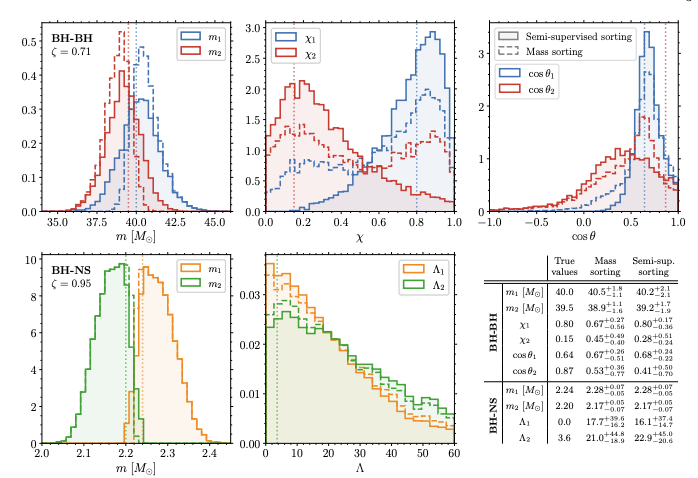

Machine-learning applied to Bayesian inference  ([Gerosa et al 20205](https://arxiv.org/pdf/2409.07519))

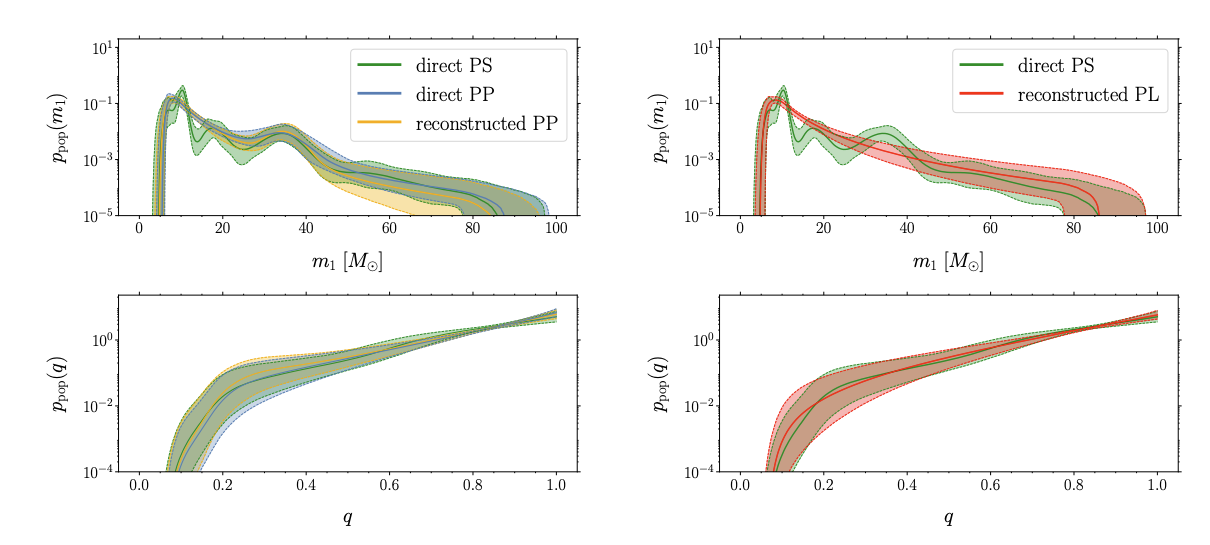

From one black hole to many black holes. Reconstruction of the population properties ([Fabbri, Gerosa et al 2025](https://arxiv.org/pdf/2501.17233))

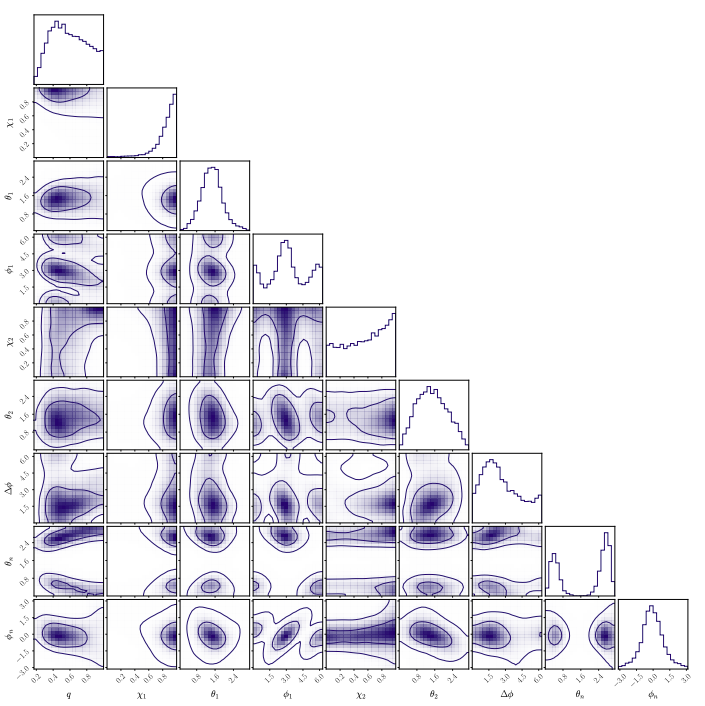

Not just gravitational waves. What black holes produced quasar 3C186? ([Boschini, Gerosa et al 2025](https://arxiv.org/pdf/2402.08740))

## Bayesian stats basics

## From "Bayes Rule" To "Bayesian Inference" <a class="anchor" id="one"></a>

Basic probability rule; this is always true:

$$p(x,y) = p(x|y)p(y) = p(y|x)p(x)$$

The marginal probability is

$$p(x) = \int p(x,y)dy = \int p(x|y)p(y) dy$$

and so

$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} = \frac{p(x|y)p(y)}{\int p(x|y)p(y) dy}$$

which in words says that

> the (conditional) probability of $y$ given $x$ is just the (conditional) probability of $x$ given $y$ times the (marginal) probability of $y$ divided by the (marginal) probability of $x$, where the latter is just the integral of the numerator.

This is **Bayes' rule**, which itself is not at all controversial, though its application can be as we'll discuss in detail. 

### The essence of the Bayesian method 

- The basic premise of the Bayesian method is that probability statements are not limited to data,  but can be made for model parameters and models themselves. 
- Inferences are made by producing  probability density functions (pdfs); most notably, **model parameters are treated as random variables**.
- These **pdfs represent our "belief spread" in what the model parameters are**. They have nothing to do with outcomes of repeated experiments (although the shape of resulting distributions can often coincide).

> In standard frequentist analysis, the data change (concept of repeated experiment) and the parameters are fixed (there exists a true value). In Baysian statistics is the opposite! The data are fixed (those are the numbers I've collected after all!) but the parameters have a probabilistic nature associated to them


### Brief History 

- The **Reverend Thomas Bayes (1702–1761)** was an English amateur mathematician who wrote a manuscript 
on how to combine an initial belief with new data to arrive at an improved belief. 
- The manuscript 
was published posthumously in 1763 and gave rise to the name Bayesian statistics. 
- **Laplace** rediscovered the Bayesian approach a decade after it was originally published, and greatly clarified some principles.  
- Howevever, Bayesian statistics did not find its ways into mainstream science until well into the 20th century, and widespread usage has been hindered until the 1990s with the advent of cheap computing that can map out the Bayesian probability distributions.

![](https://upload.wikimedia.org/wikipedia/commons/d/d4/Thomas_Bayes.gif?1613667187659)

### Bayesian Statistical Inference

You are probably familiar with the **likelihood** $p(D\,|\,M)$.  In Bayesian inference, we instead evaluate the **posterior probability** taking into account **prior** information.

Recall that Bayes' Rule is:

$$p(M\,|\,D) = \frac{p(D\,|\,M)\,p(M)}{p(D)},$$

where $D$ is for data and $M$ is for model. Or in words,

$${\rm Posterior \,\, Probability} = \frac{{\rm Likelihood}\times{\rm Prior}}{{\rm Evidence}}.$$

If we explicitly recognize prior information, $I$, and the model parameters, $\theta$, then we can write:

$$p(M,\theta \,|\,D,I) = \frac{p(D\,|\,M,\theta,I)\,p(M,\theta\,|\,I)}{p(D\,|\,I)},$$

where we will omit the explict dependence on $\theta$ by writing $M$ instead of $M,\theta$ where appropriate.  However, as the prior can be expanded to 

$$p(M,\theta\,|\,I) = p(\theta\,|\,M,I)\,p(M\,|\,I),$$

it will still appear in the term $p(\theta\,|\,M,I)$.

**NOTE** 

We don't often care about **the evidence $p(D\,|\,I)$** because it does not depend on model parameters. We usually set it to $1$ for parameter estimation. **BUT** it's at the heart of Bayesian model selection (which is also central in Bayesian model comparison) since it gives us a way of ranking different model descriptions of the data.  

**The Bayesian Statistical Inference process** is then
1. formulate the likelihood, $p(D\,|\,M,\theta,I)$
2. chose a prior, $p(M,\theta\,|\,I)$, which incorporates *other information beyond the data in $D$*
3. determine the posterior pdf, $p(M,\theta \,|\,D,I)$
4. explore/map the posterior distribution $p(M,\theta \,|\,D,I)$ 
5. extract some summary statistics and quantify the uncertainty of the model parameter estimates
6. perform model selection to find the most apt description of the data

> Compare these bullet points with a pure MLE workflow you've seen in other classes: what's similar, and what's different?

Before applying this expression, we need to discuss how to choose priors.

### Bayesian credible regions <a class="anchor" id="three"></a>

In the **frequentist paradigm**, the meaning of the *confidence interval* $\mu_0 \pm \sigma_{\mu}$ is 
the interval that would contain the true $\mu$ (from which the data were drawn) in $68\%$ (or X\%) cases
of a large number of *imaginary repeated experiments* (each with a different N values of $\{x_i\}$). 

However, the meaning of the so-called ***Bayesian credible region*** is *fundamentally different*: it is the interval that contains the true $\mu$ with a probability of $68%\$ (or $X\%$), given the given dataset (our dear one and only dataset - there are no imaginary experiments in Bayesian paradigm). This credible region is the 
relevant quantity in the context of scientific measurements. 

There are several important features of a Bayesian posterior distribution:
- They represent how well we believe a parameter is constrained within a certain range
- We often quote the posterior maximum (**Maximum A Posteriori (MAP)**).
- We also often quote the posterior expectation value (i.e. mean) $\bar{\theta} = \int \theta\, p(\theta|D)d\theta$, or its median.

## Simple parameter estimation examples <a class="anchor" id="four"></a>

### IQs from 1978

The following article provides a nice example that is visualized below (without the detailed math): [Efron 1978 "Controversies in the Foundations of Statistics"](http://www.jstor.org/stable/2321163?seq=1#page_scan_tab_contents).

The IQ of the population has mean of 100 and standard deviation 15. Alice takes a test which returns an IQ of 160. Given these pieces of information, what is the IQ of Alice?

Let's see the result before the maths:

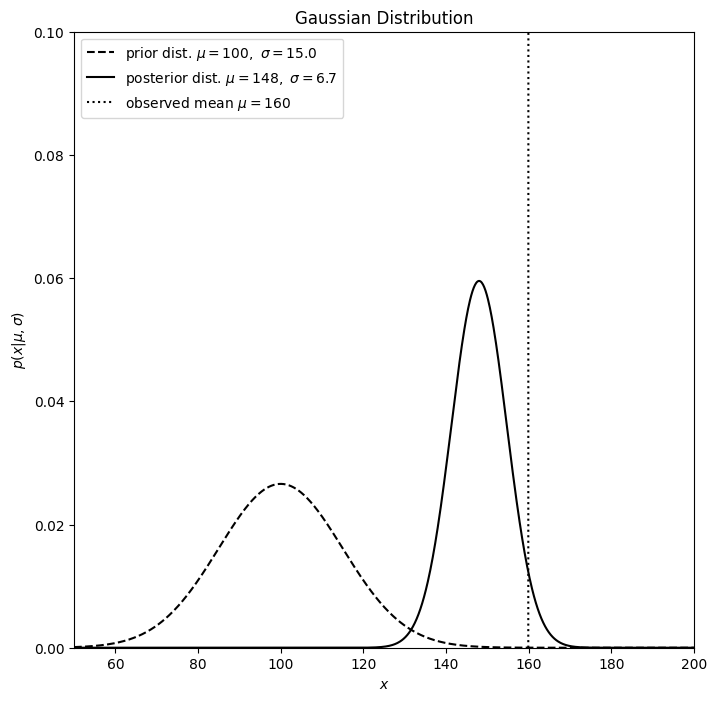

In [11]:
import numpy as np
from matplotlib import pyplot as plt

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform

#from astroML.plotting import setup_text_plots
#setup_text_plots(fontsize=10, usetex=True)

#------------------------------------------------------------
# Define the distributions to be plotted
sigma_values = [15, 6.7, 1] #complete with the prior width of IQ distribution
linestyles = ['--', '-', ':']
mu_values = [100, 148, 160] #complete with the prior mean of IQ distribution
labeltext = ['prior dist.', 
             'posterior dist.', 
             'observed mean']
xplot = np.linspace(50, 200, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(8, 8))

for sigma, ls, mu, lab in zip(sigma_values, 
                              linestyles, 
                              mu_values, 
                              labeltext):
    
    # create a gaussian / normal distribution
    dist = norm(mu, sigma)

    if sigma > 1:
        plt.plot(xplot, dist.pdf(xplot), 
                 ls=ls, c='black',
                 label=r'%s $\mu=%i,\ \sigma=%.1f$' % (lab, mu, sigma))
    else:
        plt.plot([159.9, 160.1], [0, 0.8], 
                 ls=ls, color='k', label=r'%s $\mu=%i$' % (lab, mu))
        
plt.xlim(50, 200)
plt.ylim(0, 0.1)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend()
plt.show()

The end result (skipping over the detailed math) is that Alice's is not 160, but rather 148! More specifically, my Bayesian measurement is that $p(141.3\le \mu \le 154.7 \, | \, \overline{x}=160) = 0.683$ (i.e. there's a probability of 68% that Alice's IQ is between 141.3 and 154.7). This estimate incorporates not only the test I made to that person, but also the prior information of how the IQ distribution is calibrated. We already saw (remember the Monty Hall problem?) the huge influence that priors can have.

This all seems totally fine; where's the controvery with Bayesian methods? The controvery arises when we don't know the prior distribution (at least not explicitely! There's always a prior!), or when the parameter is fixed but we are trying to experimentally verify it (e.g., the speed of light).

### Position of a star

Consider the case of measuring a star when you know your telescope very well.  We want to know the posterior pdf for the brigthness of the star, $p(M,\theta|D,I) \equiv p(\mu|\{x_i\},\{\sigma_i\},I)$ (so I'm not trying to estimate the sigmas from the data, I know them already).

For the likelihood we have

$$L = p(\{x_i\}|\mu,I) = \prod_{i=1}^N \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}
{2\sigma_i^2}\right).$$

**In the Bayesian case, we also need a prior.**  We'll adopt a *flat uniform distribution* given by

$$p(\mu|I) = C, \; {\rm for} \; \mu_{\rm min} < \mu < \mu_{\rm max},$$

where $C = \frac{1}{\mu_{\rm max} - \mu_{\rm min}}$ between the min and max and is $0$ otherwise.

The log of the posterior pdf is then

$$\ln L = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma_i^2}.$$

This is easy, the posterior is just a Gaussian with a maximum at
 
$$\mu^0 = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$

We get this easy result because we used a flat prior.

---


Now let's consider the case where **$\sigma$ is not known**, but rather it needs to be determined from the data, too. This might be because I cannot trust my assumption on how the sky will behave tonight. 

I want to use the data to measure **both** the star and the properties of the sky. But crucially, I only care about the star.

In this case, the posterior pdf that we seek is not $p(\mu|\{x_i\},\{\sigma_i\},I)$, but rather the joint $2$D pdf $p(\mu,\sigma|\{x_i\},I)$.

As before we have

$$L = p(\{x_i\}|\mu,\sigma,I) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right),$$

except that now $\sigma$ is uknown.

Our Bayesian prior is *now 2D instead of 1D* and we'll adopt 

$$p(\mu,\sigma|I) \propto \frac{1}{\sigma},\; {\rm for} \; \mu_{\rm min} < \mu < \mu_{\rm max} \; {\rm and} \; \sigma_{\rm min} < \sigma < \sigma_{\rm max}.$$

With proper normalization, we have

$$p(\{x_i\}|\mu,\sigma,I)p(\mu,\sigma|I) = C\frac{1}{\sigma^{(N+1)}}\prod_{i=1}^N \exp\left( \frac{-(x_i-\mu)^2}{2\sigma^2}  \right),$$

where

$$C = (2\pi)^{-N/2}(\mu_{\rm max}-\mu_{\rm min})^{-1} \left[\ln \left( \frac{\sigma_{\rm max}}{\sigma_{\rm min}}\right) \right]^{-1}.$$

The log of the posterior pdf is

$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma^2}.$$

Since we are assuming a Gaussian distribution, the mean, $\overline{x}$, and the variance, $V (=s^2)$, completely characterize the distribution. So we can write this expression in terms of those variables instead of $x_i$.  Skipping over the math details (see textbook $\S$5.6.1), we find

$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \frac{N}{2\sigma^2}\left( (\overline{x}-\mu)^2 + V  \right).$$

Note that this expression only contains the 2 parameters that we are trying to determine: $(\mu,\sigma)$ and 3 values that we can determine directly from the data: $(N,\overline{x},V)$. A side note: these three data-based values fully encapsulate our dataset and are called *sufficient statistics*.

This code visualizes the posterior pdf for the case of $(N,\overline{x},V)=(10,1,4)$. Play around with it  changing the values of $(N,\overline{x},V)$.</font> 

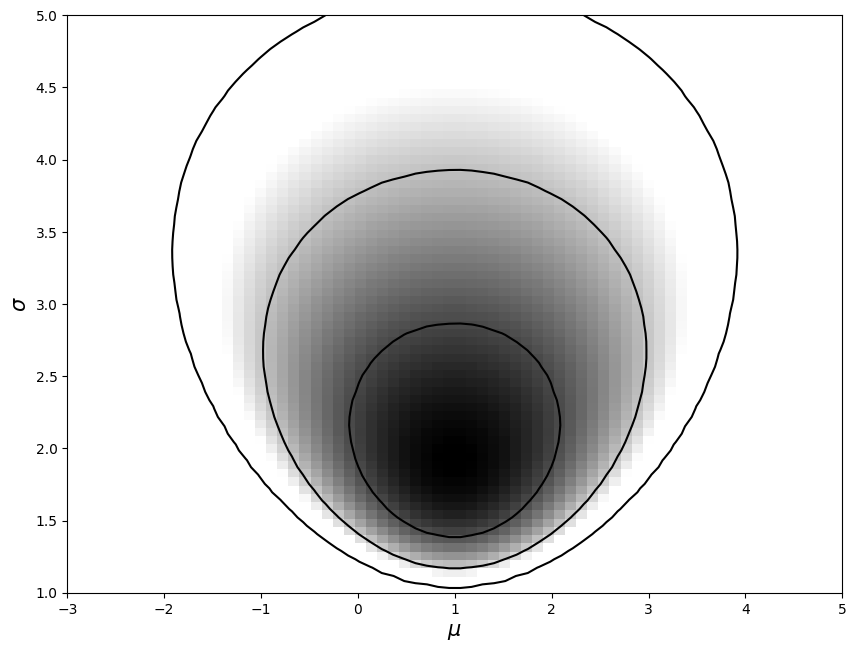

In [28]:
# %load code/fig_likelihood_gaussian.py
"""
Log-likelihood for Gaussian Distribution
----------------------------------------
Figure5.4
An illustration of the logarithm of the posterior probability density
function for :math:`\mu` and :math:`\sigma`, :math:`L_p(\mu,\sigma)`
(see eq. 5.58) for data drawn from a Gaussian distribution and N = 10, x = 1,
and V = 4. The maximum of :math:`L_p` is renormalized to 0, and color coded as
shown in the legend. The maximum value of :math:`L_p` is at :math:`\mu_0 = 1.0`
and :math:`\sigma_0 = 1.8`. The contours enclose the regions that contain
0.683, 0.955, and 0.997 of the cumulative (integrated) posterior probability.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
from astroML.plotting.mcmc import convert_to_stdev

def gauss_logL(xbar, V, n, sigma, mu):
    """Equation 5.57: gaussian likelihood"""
    return (-(n + 1) * np.log(sigma)
            - 0.5 * n * ((xbar - mu) ** 2 + V) / sigma ** 2)

#------------------------------------------------------------
# Define the grid and compute logL
sigma = np.linspace(1, 5, 70)
mu = np.linspace(-3, 5, 70)
xbar = 1
V = 4
n = 10

logL = gauss_logL(xbar, V, n, sigma[:, np.newaxis], mu)
logL -= logL.max()

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(10, 7.5))
plt.imshow(logL, origin='lower',
           extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap=plt.cm.binary,
           aspect='auto')
#plt.colorbar().set_label(r'$\ln(L)$', fontsize=15)
plt.clim(-5, 0)

plt.contour(mu, sigma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

#plt.text(0.5, 0.93, r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ V=4,\ n=10$',
#         bbox=dict(ec='k', fc='w', alpha=0.9),
#         ha='center', va='center', 
#         fontsize=15, transform=plt.gca().transAxes)

plt.xlabel(r'$\mu$', fontsize=15)
plt.ylabel(r'$\sigma$', fontsize=15)

plt.show()

The example above dealt with Bayesian parameter estimation of a Gaussian distribution, for $\mu$ and $\sigma$. **But what if the values we measure $\{x_i\}$ also have a measurement uncertainty?** Crucially, we're dealing with two levels of spread then:

- the underlying distribution spread, $\sigma$, and 
- the measurement uncertainties of the data, $\{e_i\}$

The measurement uncertainties further blur the underlying distribution. In fact, if the uncertainties are homoscedastic, the distribution of $\{x_i\}$ will be Gaussian, ***BUT*** **if the uncertainties are heteroscedastic the distribution of $\{x_i\}$ will be non-Gaussian!**

We're trying to find the $\mu$ and $\sigma$ parameters of the underlying distribution. With uniform priors on each, the log-posterior pdf can be written as

$$ \ln p = \mathrm{constant} - \frac{1}{2}\sum_{i=1}^N \left( \ln(\sigma^2+e_i^2) + \frac{(x_i-\mu)^2}{(\sigma^2+e_i^2)} \right), $$

which looks identical to the log-likelihood $\ln L$ up to a constant due to the uniform priors. We can actually analytically maximize this to find the MAP (maximum a posteriori) value of $\mu_0$,

$$ \mu_0 = \frac{\sum_{i=1}^N x_i / (\sigma_0^2 + e_i^2)}{\sum_{i=1}^N 1 / (\sigma_0^2 + e_i^2)} $$

but a closed-form analytic solution for $\sigma_0$ does not exist. 

So we resort to numerical methods and just plot $\ln p$ on a grid. 


The following to produces the log-posterior pdf of parameters $\mu$ and $\sigma$ of an underlying Gaussian distribution. The dataset has $N=10$ values, drawn from $\mu=1$, $\sigma=1$, each measured with an uncertainty drawn from a uniform distribution $0<e_i<3$.

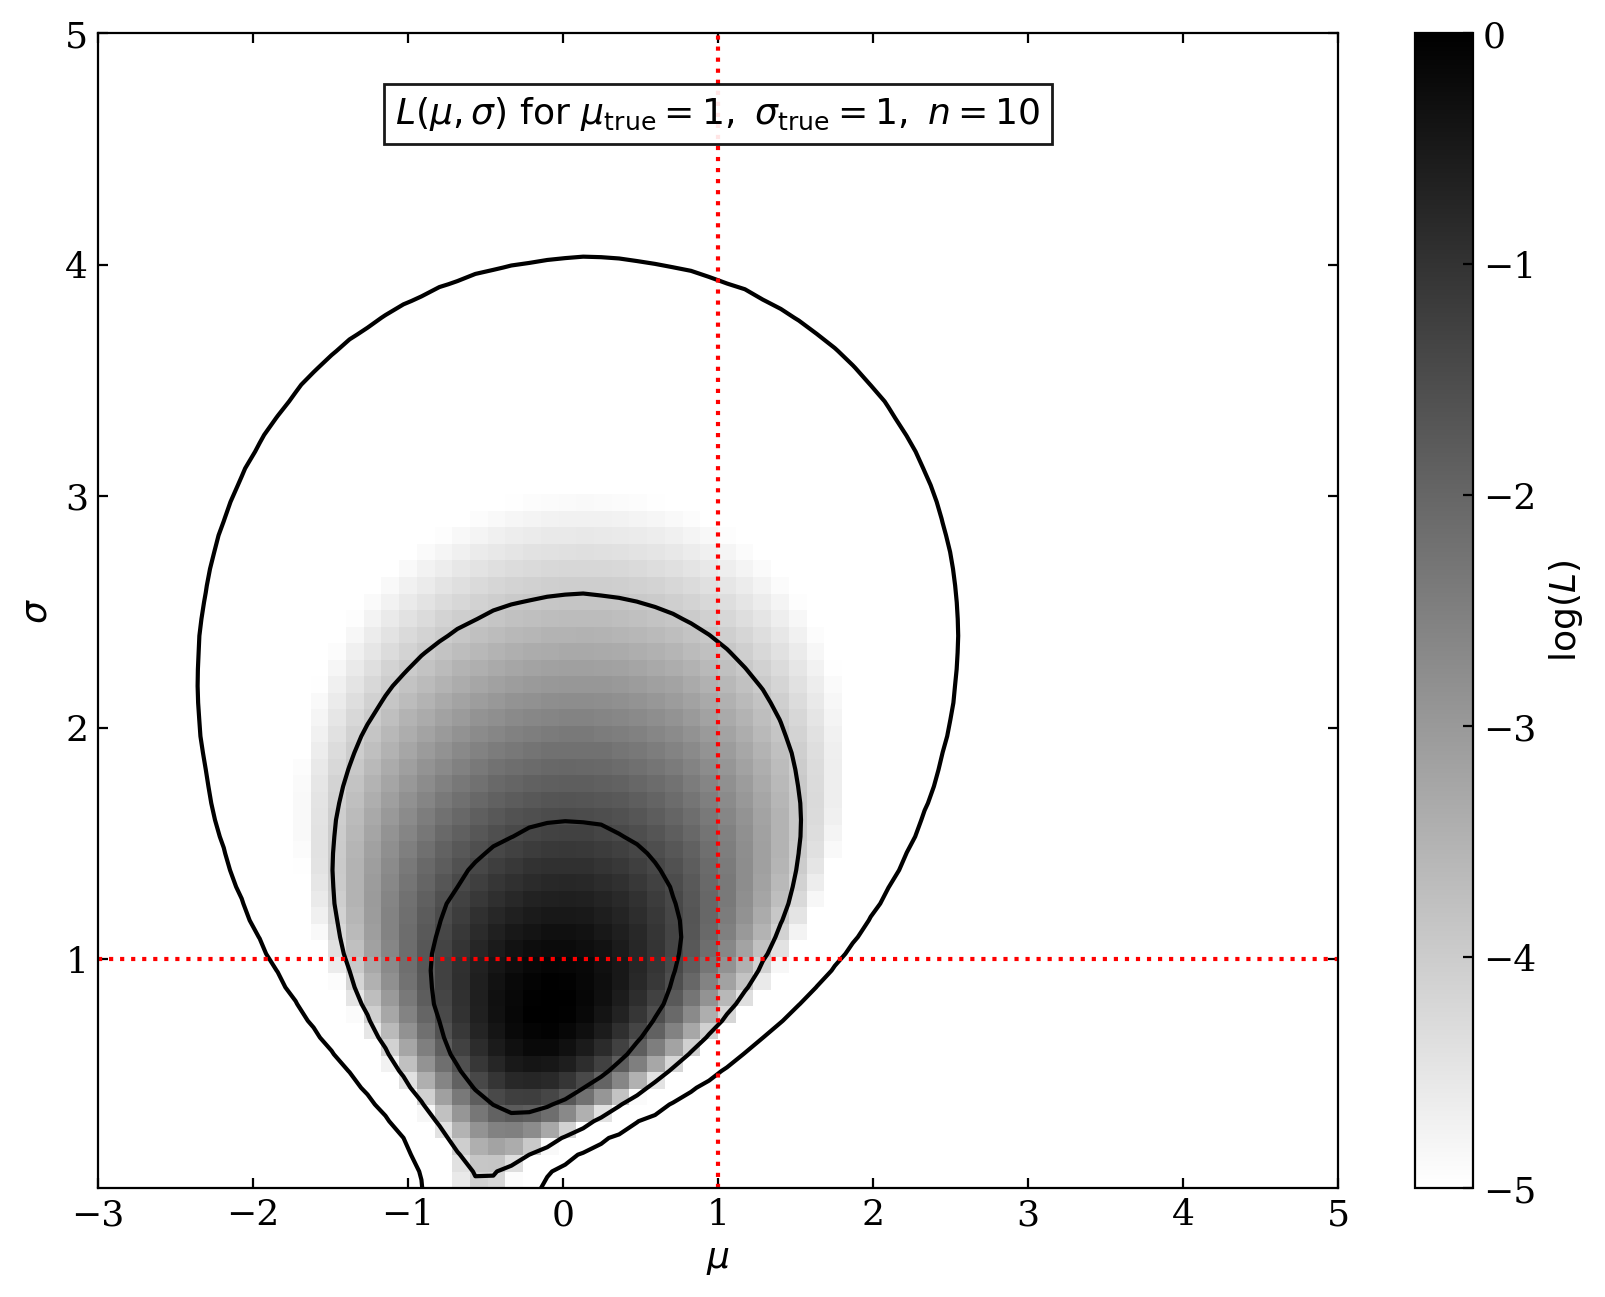

In [29]:
# Execute this cell
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
#np.random.seed(42)

"""
Gaussian Distribution with Gaussian Errors
------------------------------------------
Figure 5.7

The logarithm of the posterior probability density function for :math:`\mu`
and :math:`\sigma`, :math:`L_p(\mu,\sigma)`, for a Gaussian distribution with
heteroscedastic Gaussian measurement errors (sampled uniformly from the 0-3
interval), given by eq. 5.64. The input values are :math:`\mu = 1` and
:math:`\sigma = 1`, and a randomly generated sample has 10 points. Note that
the posterior pdf is not symmetric with respect to the :math:`\mu = 1` line,
and that the outermost contour, which encloses the region that contains 0.997
of the cumulative (integrated) posterior probability, allows solutions with
:math:`\sigma = 0`.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=13, usetex=False)

np.random.seed(42)

#np.random.seed(4211)

def gaussgauss_logL(xi, ei, mu, sigma):
    """Equation 5.63: gaussian likelihood with gaussian errors"""
    ndim = len(np.broadcast(sigma, mu).shape)

    xi = xi.reshape(xi.shape + tuple(ndim * [1]))
    ei = ei.reshape(ei.shape + tuple(ndim * [1]))

    s2_e2 = sigma ** 2 + ei ** 2
    return -0.5 * np.sum(np.log(s2_e2) + (xi - mu) ** 2 / s2_e2, 0)

#------------------------------------------------------------
# Define the grid and compute logL
#np.random.seed(5)
mu_true = 1.
sigma_true = 1.
N = 10
ei = 3 * np.random.random(N)
xi = np.random.normal(mu_true, np.sqrt(sigma_true ** 2 + ei ** 2))

sigma = np.linspace(0.01, 5, 70)
mu = np.linspace(-3, 5, 70)

logL = gaussgauss_logL(xi, ei, mu, sigma[:, np.newaxis])
logL -= logL.max()

#------------------------------------------------------------
# plot the results
fig = plt.figure(figsize=(10, 7.5))
plt.imshow(logL, origin='lower',
           extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap=plt.cm.binary,
           aspect='auto')
plt.colorbar().set_label(r'$\log(L)$')
plt.clim(-5, 0)

plt.text(0.5, 0.93,
         (r'$L(\mu,\sigma)\ \mathrm{for}\ \mu_{\rm true}=1,\ '
          r'\sigma_{\rm true}=1,\ n=10$'),
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', transform=plt.gca().transAxes)

plt.contour(mu, sigma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

plt.axhline(mu_true,c='red',ls='dotted')
plt.axvline(sigma_true,c='red',ls='dotted')

plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

plt.show()


**Key takeaways**
- By eye,  $\mu=1$, $\sigma=1$ are not too far from the MAP parameter values. This is ok, but...
- The posterior pdf is not symmetric around $\mu=1$.
- In fact it is consistent within the $99.7\%$ credible region of having $\sigma=0$!. 
- The marginal distributions of each parameter would not look Gaussian either.


Now try changing the random seed, explain what's going one... Also try changin the number of datapoints as well as the maximum value of $e_i$.


## Monte Carlo Methods & Markov Chains <a class="anchor" id="one"></a>

### Motivation

Ok that was already pretty convoluted... and it's actually one of the easiest thing you can possibly do in statistics! Gaussian errors on one variable...

Still, we had to *numerically* scan the posterior, find its maximum, and understand what was going on. That was was only a $2$D problem!

However, **what about high parameter dimensions?** Modern applications span hundreds or maybe thousands of dimensions!
- Even in a case of rather simple $5$D problem, filling a grid with 100 points per dimension results in $10^{10}$ values! And often we work with models of much higer dimensionality (it can be thousands!). **Brute-force grid methods are not feasible beyond a few dimensions**, and even then can be waste of time. 
- You could **simply randomly sample the grid at every point**, and try to find the minimum based on that. But that can also be quite time consuming, and you will spend a lot of time in regions of parameter space that yields small likelihood.

A better way is to adopt a ***Markov-Chain Monte Carlo (MCMC)***. MCMC gives us a way to make this problem computationally tractable by sampling the full multi-dimensional parameter space, in a way that builds up the most sample density in regions that are closest to the maximum probability. Then, you can post-process the “chain” of points to infer the posterior distribution and uncertainty regions.

This a typical MCMC resul, from the Ivezic et al text book, Figure 5.22. It shows a 2D problem done with a both a posterior scan and a Markov Chain Monte Carlo algorithm. The solid lines are from the MCMC estimate with 10,000 sample points. Not exact (it's stochastic sampling!) but we can understand our errors very well.

![Ivezic, Figure 5.10](http://www.astroml.org/_images/fig_cauchy_mcmc_1.png)

Markov Chains are one of the two ingredients in MCMC (Monte Carlo Markov Chains), which is a major sampling technique.

Evaluating a posterior faithfully can be very hard. **The key ideas behind MCMC approaches are**:
- We do not try to evaluate the posterior everywhere on a full grid; instead, the goal is to *sample* it. Once we have samples, we can reconstruct the posterior with a suitable density-estimation scheme.
- We use stochastic sampling (random numbers) to explore parameter space efficiently.

### Why Monte Carlo?

The name derives from the name of an administrative area of the Principality of Monaco ([Monte Carlo](https://www.wikiwand.com/en/Monte_Carlo)) known for high-stakes casinos and gambling. Gambling and random sampling go hand in hand together.

![](https://www.thomascook.com/.imaging/mte/thomascook-theme/og-image/dam/legacy/heros/citybreaks/monte-carlo/montecarlohero.jpg/jcr:content/montecarlohero.jpg)


## Monte Carlo integration

Monte Carlo integration is an absolute crucial notion in modern statistics (modern because it relies on generating a large number of data points, which has been made possible by computers). Suppose you have very a complicated integral to solve (any integral, it's completely generic!). You write down the integrand as a product of $f(x)$ and $p(x)$ such that $\int p(x)=1$ (this is not restrictive at all! See below). My nasty integral is

$$\int g(x) dx =\int f(x) p(x) dx$$


Provided one can **evaluate** $f(x)$ and **sample** $p(x)$, then


$$\int f(x) p(x) dx \approx \frac{1}{N}\sum_{i=1}^N f(x_i) $$

where $x_i$ are samples drawn from $p$. 

Take a deep breath and appreciate how poerful this is. It works in any number of dimensions!!!

### Example 1. A messy integral.

Ok try to integrate this crazy thing I just came up with. Pen and paper? Good luck.
    
$$\int_{0.3}^4 dx \frac{\exp(x) \sqrt{4x+3}  \log(x^6)}{\tanh(x)}$$

Pen and paper? Good luck. With a computer? Easy peasy!

First, I divide and multiply by $4-0.3$. This is because 1/(4-0.3) is the uniform distribution $p(x)$ for x between 0.3 and 4.

$$ (4-0.3) \times \int_{0.3}^{4} \frac{dx}{(4-0.3)} \frac{\exp(x) \sqrt{4x+3} * \log(x^6)}{\tanh(x)}$$

Now I have $p(x)=\frac{1}{4-0.3}$ and $f(x) = \frac{\exp(x) \sqrt{4x+3} * \log(x^6)}{\tanh(x)}$. All I need to do is generate numbers from $p$, put them into $f$, and sum the results.

In [31]:
xmax= 4
xmin=0.3

xi=np.random.uniform(xmin,xmax, 10000000)

def fun(x):
    return np.exp(x)*(4*x+3)**0.5 * np.log(x**6)/np.tanh(x)

integral = (xmax-xmin) * np.mean(fun(xi))

integral


np.float64(1391.5603253620677)

Run the cell again. And again. The result is different each time. We have an *estimator* of our integral. Because of the central limit theorem, this estimator is unbiased.

Of course, the larger the number of points the higher the accuracy. How do you think the error scales with sample size?

[]

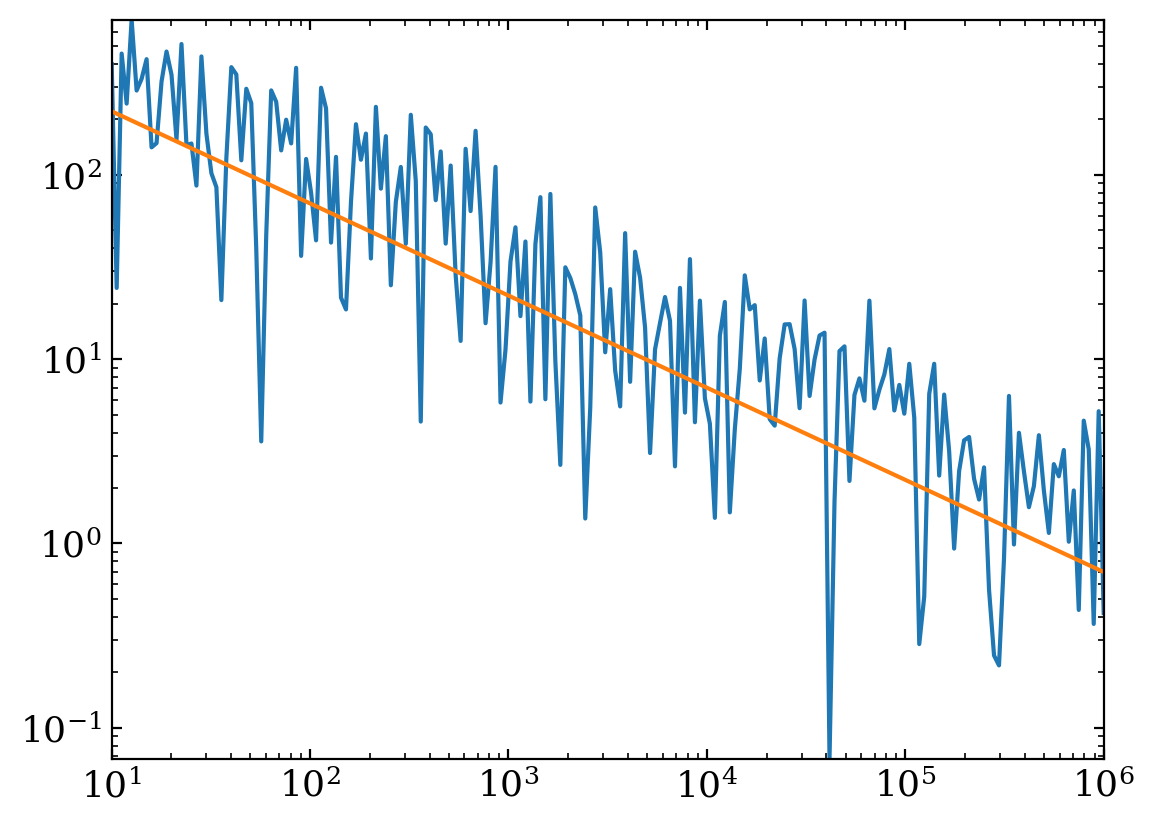

In [32]:
Ns= np.geomspace(10,1e6,200)
truevalue=1391.76


residuals=[]
for N in Ns:
    xi=np.random.uniform(xmin,xmax, int(N))
    integral=((xmax-xmin) * np.mean(fun(xi)))
    residuals.append(np.abs(integral-truevalue))
    
plt.plot(Ns,residuals)

plt.plot(Ns,700*Ns**(-0.5)) #The number 700 is arbitray, only the slope is important here!

plt.loglog()

The error scales as $1/\sqrt{N}$ which is right. (If you don't know why, refresh your memory on the central limit theorem!) 

### Quick exercise

Using Monte Carlo integration, check that

$$
\int_0^\infty x^3 \exp\left(-
rac{x^2}{2\sigma^2}
\right) \,dx = 2\sigma^4 .
$$

How many draws does it take to get the error down to 1 part in a thousand?

## What is a Markov Chain?

A Markov Chain is defined as 

> a sequence of random variables (or *chain*) where a parameter depends *only* on the preceding value. Such processes are "memoryless".  
 
That's it. Simple.
 
 
Mathematically, we have

$$p(\theta_{i+1}|\theta_i, \theta_{i-1}, \theta_{i-2}, \cdots) = p(\theta_{i+1}|\theta_i).$$

For  equilibrium, or a stationary distribution of positions, it is necessary that the transition probability is symmetric:

$$    p(\theta_{i+1}|\,\theta_i) = p(\theta_i |\, \theta_{i+1}). $$

This is called the ***principle of detailed balance*** or reversibility condition (i.e. the probability of a jump between two points does not depend on the direction of the jump).

For instance, the stock market has phases of growing prices (bull), dreasing prices (bear) and recession. This would a a Marov Chain model:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Finance_Markov_chain_example_state_space.svg/400px-Finance_Markov_chain_example_state_space.svg.png)


A great example of a physical process well desribed by a Markow Chain is that of gas diffusion: two boxes, and want to know then nubmer of molecules in each box at any given time. These are called Ehrenfest chains
- https://www.randomservices.org/random/markov/Ehrenfest.html
- https://phys.libretexts.org/Bookshelves/Mathematical_Physics_and_Pedagogy/Computational_Physics_(Chong)/12%3A_Markov_Chains/12.03%3A_The_Ehrenfest_Model


![](https://www.randomservices.org/random/markov/Ehrenfest.png)

## Markov Chain Monte Carlo (MCMC) Techniques <a class="anchor" id="two"></a>

> The use of **Markov chains** to perform **Monte Carlo integration** is called ***Markov Chain Monte Carlo (MCMC)***.

Given such a Markov chain of length $N$ that corresponds to draws of $p(\theta)$, integrals can be estimated as

$$ \int g(\theta) \, p(\theta) \, d\theta \approx {1 \over N} \sum_{i=1}^Ng(\theta_i).$$

- To estimate the expectation value for $\theta_1$ (i.e., $g(\theta)=\theta_1$), we simply take the mean value of all $\theta_1$ in the chain.
- To visualize the posterior pdf for parameter $\theta_1$, marginalized over all other parameters, $\theta_2, \ldots, \theta_k$, we can construct a histogram of all $\theta_1$ values in the chain, and normalize its integral
to 1. 
- To get a MAP (*maximum a posterori*) estimate for $\theta_1$, we find the maximum of this marginalized pdf.

In order for a Markov chain to reach a **stationary distribution** proportional to $p(\theta)$, the probability of arriving at a point $\theta_{i+1}$ must be proportional to $p(\theta_{i+1})$,

$$ p(\theta_{i+1}) = \int  T(\theta_{i+1}|\theta_i)  \,   p(\theta_i) \,    d \theta_i, $$

where the transition probability $T(\theta_{i+1}|\theta_i)$ is called the **proposal distribution** (and it is assumed that we know how to compute $p(\theta_i)$). The proposal distribution is exactly what it sounds like-- it proposes new positions to jump to in parameter space.

This requirement will be satisfied when the transition probability satisfies **the principle of detailed balance**

$$ T(\theta_{i+1}|\theta_i)  \,  p(\theta_i) = T(\theta_i|\theta_{i+1})  \,  p(\theta_{i+1}). $$

Most of the difficulty in MCMC comes from either determining the burn-in or deciding how to step from one position to another.  In the $\pi$ circle example in this notebook, we drew points in a completely random manner. However, that's sub-optimal. ***We want random sampling that preferentially steps into regions of high probability density.***  

The most commonly used algorithm for stepping from one position to another is the [Metropolis-Hastings](https://en.wikipedia.org/wiki/Metropolis%E2%80%93Hastings_algorithm) algorithm.  

## The Metropolis-Hastings Algorithm <a class="anchor" id="three"></a>

**The Metropolis-Hastings algorithm** adopts the following acceptance probability for newly proposed points to step to:

$$ p_{\rm acc}(\theta_i,\theta_{i+1}) = { p(\theta_{i+1}) \over p(\theta_i) }, $$

where the proposed point $\theta_{i+1}$ is drawn from an *arbitrary* symmetric density distribution $T(\theta_{i+1}\,|\,\theta_i)$. Since it is symmetric, the **ratio of transition probabilities cancels out and detailed balance is ensured**. A Gaussian distribution centered on the current point $\theta_i$ is often used for $T(\theta_{i+1}|\theta_i)$.

This algorithm guarantees that the chain will reach an equilibrium, or stationary, distribution, and it will approximate a sample drawn from $p(\theta)$! 

**In summary, the Metropolis-Hastings algorithm consists of these steps:**

1. Given $\theta_i$ and $T(\theta_{i+1}|\theta_i)$, draw a proposed value for $\theta_{i+1}.$ 
2. Compute acceptance probability $p_{\rm acc}(\theta_i,\theta_{i+1})$.
3. Draw a random number between 0 and 1 from a uniform distribution; if it is smaller than $p_{\rm acc}(\theta_i,\theta_{i+1})$, then accept $\theta_{i+1}$. 
4. ***If $\theta_{i+1}$ is accepted added it to the chain. If not, add $\theta_{i}$ to the chain.***
5. Use the chain (of $\theta$ values) for inference; e.g. a histogram of $\theta$ is an estimator of the posterior pdf for $\theta$, $p(\theta)$, and the expectation value for $\theta$ can be computed from 

  $$ I = \int g(\theta) \, p(\theta) \, d\theta = \frac{1}{N} \sum_{i=1}^N g(\theta_i).$$

where N is the number of elements in the chain (e.g. the expectation value for $\theta$ is simply the mean value of chain elements). 

***Step 4*** is very important. If we only accepted points of higher probability then we would only move up the posterior density to find its maximum. But we want to map out the full posterior density, so sometimes we must settle for less!

### Corner plots
If you are using MCMC, then you probably have multiple parameters (otherwise, you'd be doing something easier).  So, it helps to display the parameters two at a time, marginalizing over the other parameters.  An example is given in Ivezic, Figure 5.24, which compares the model results for a single Gaussian fit to a double Gaussian fit. These are called `corner` or `triangle` plots, which we've discussed before.

The most popular packages to make these are [corner](https://corner.readthedocs.io/en/latest/) and [chainconsumer](https://samreay.github.io/ChainConsumer/) (I used [scotchcorner](https://github.com/mattpitkin/scotchcorner) which was great, but it looks like it's not maintained anymore).


This is an example from my research field: a binary black hole injected in LIGO/Virgo/KAGRA noise

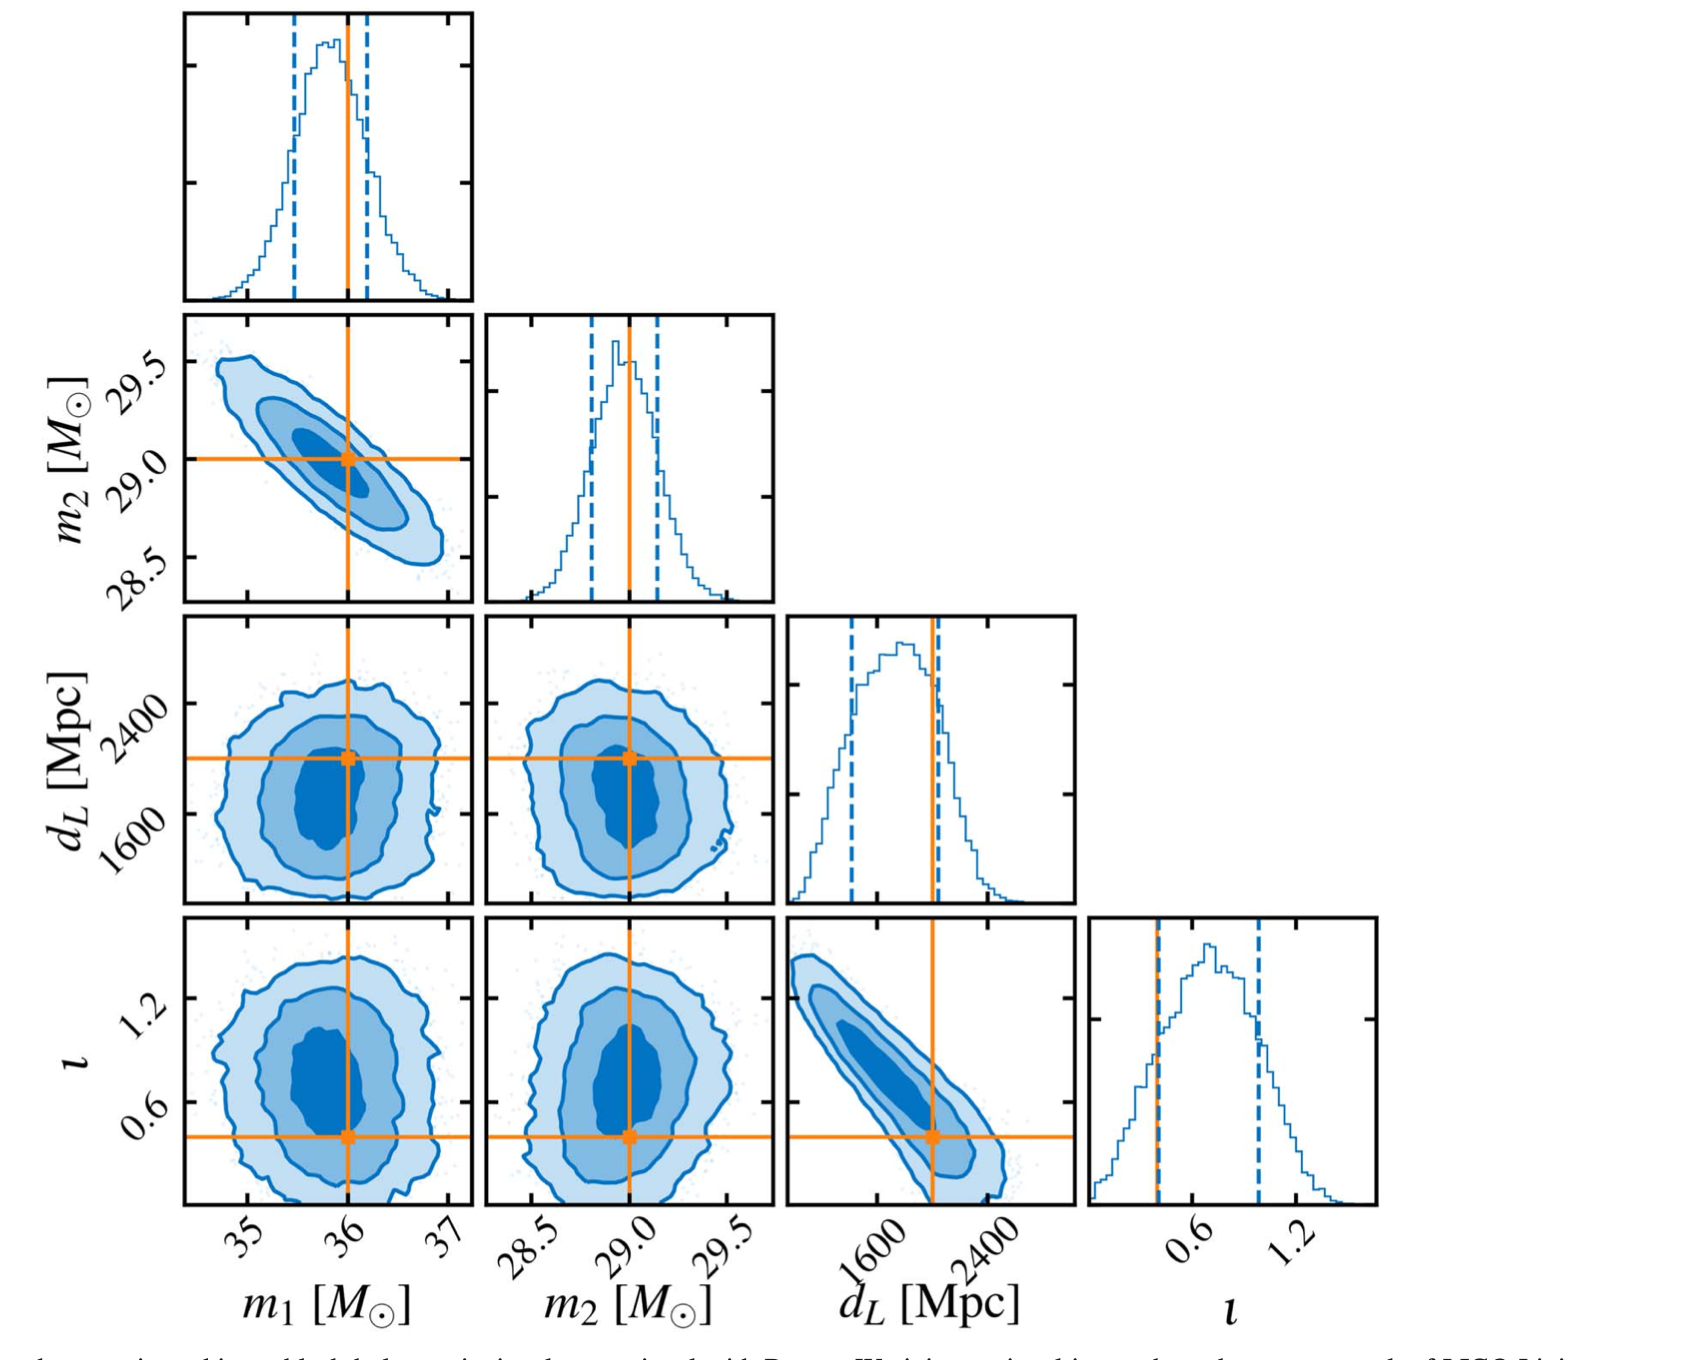

[(Ashton et al 2018)](https://arxiv.org/abs/1811.02042)

## Worked example <a class="anchor" id="four"></a>

Let's now go through the worked example from
[http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/](http://twiecki.github.io/blog/2015/11/10/mcmc-sampling/).

Let's generate some data points and plot them.  We'll try a normal distribution, centered at 0 with 100 data points, using [numpy.random.randn](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html). Our goal is to estimate $\mu$.

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


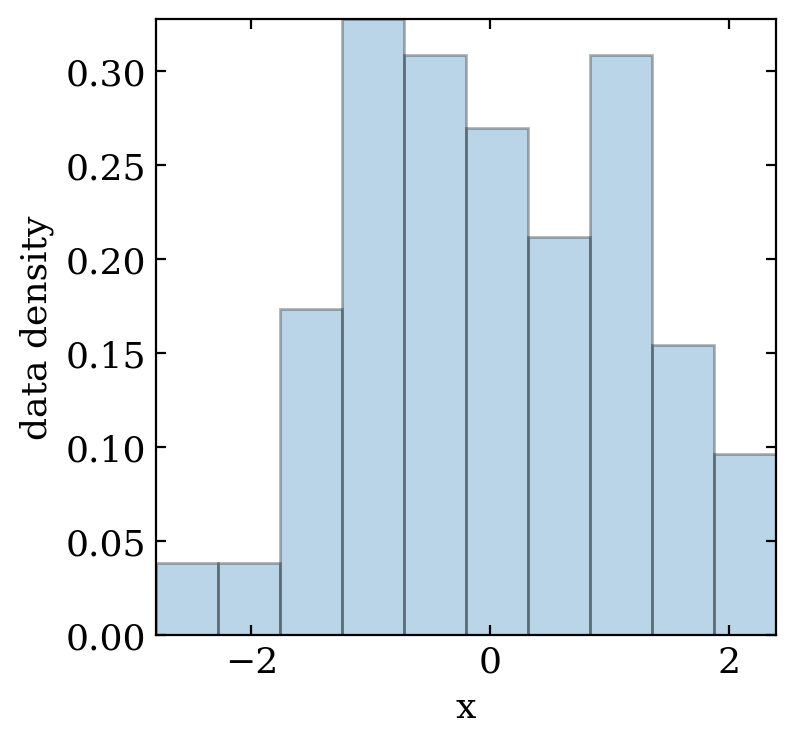

In [33]:
import scipy as sp
import numpy as np
import pandas as pd
import pylab as plt
from scipy.stats import norm

np.random.seed(123)

data = np.random.randn(100)
plt.figure(figsize=(4,4))
plt.hist(data, bins=10, density=True, alpha=0.3)
plt.xlabel('x')
plt.ylabel('data density');

Now we have to pick a model.

- We'll assume a Gaussian likelihood distribution: $\mathscr{N}(\mu,\sigma=1)$ (i.e., with $\sigma=1$).  
- We'll also assume a Gaussian distribution for the prior on $\mu$: $\mathscr{N}(0,1)$.

We can use that to write an analytic function for our posterior distribution as follows (*recalling that the product of two Gaussians is also a Gaussian*):

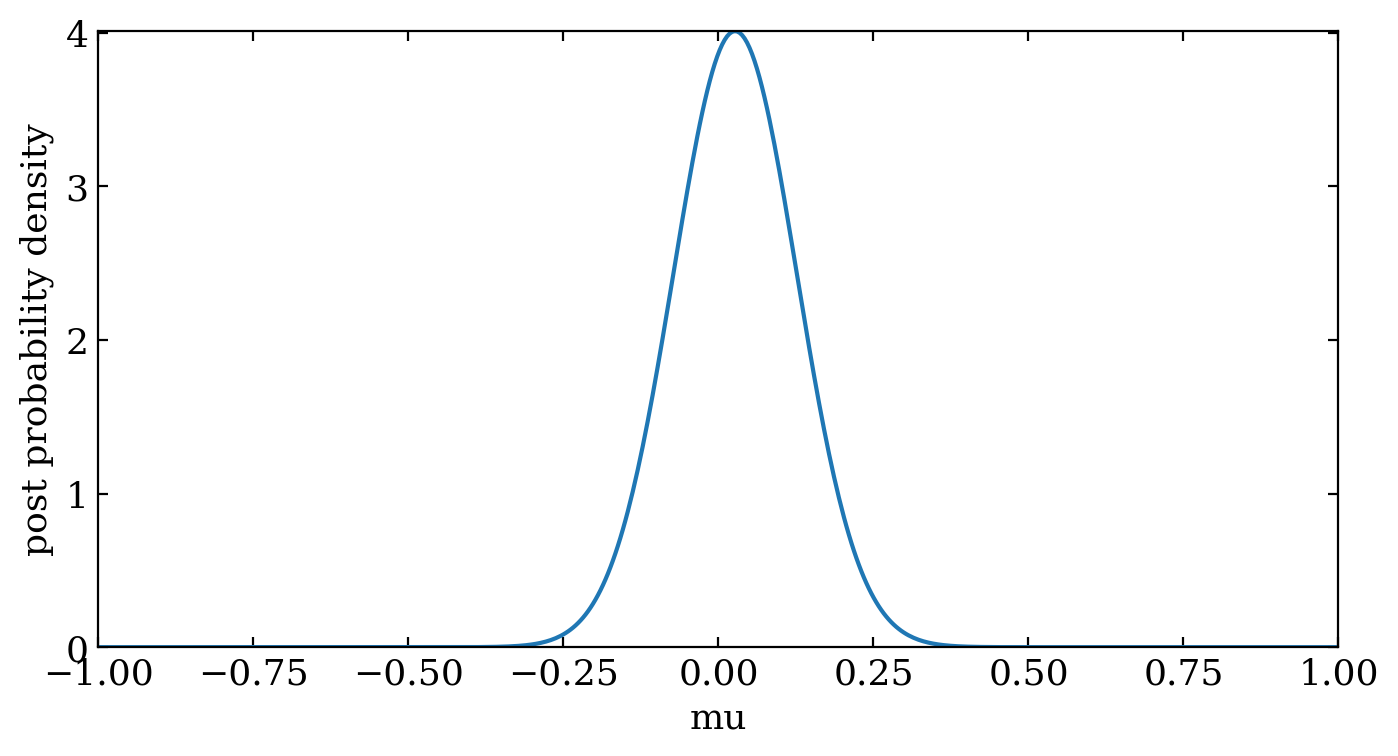

In [34]:
# Execute this cell
def calc_posterior_analytical(data, xgrid, mu_0, sigma_0):
    sigma = 1.
    n = len(data)
    
    # Error-weighted sum of prior and average of data
    # Recall the product of 2 Gaussians
    
    # This is the Gaussian for the prior: mu_0 / sigma_0**2
    # This is the Gaussian for the likelihood: data.sum() / sigma**2
    # We are deriving the mean from the sum of the data values
    
    mu_post = (mu_0 / sigma_0**2 + data.sum() / sigma**2) / (1. / sigma_0**2 + n / sigma**2)
    var_post = (1. / sigma_0**2 + n / sigma**2)**-1
    
    return norm.pdf(xgrid, mu_post, np.sqrt(var_post))

plt.figure(figsize=(8,4))
xgrid = np.linspace(-1, 1, 500)
posterior_analytical = calc_posterior_analytical(data, xgrid, 0., 1.)
plt.plot(xgrid, posterior_analytical)
plt.xlabel('mu')
plt.ylabel('post probability density');

Let's try this instead with MCMC. 

- We'll start with a trial $\mu_0 = -1$ and evaluate.
- Then we'll jump to a new position using the Metropolis-Hastings algorithm mentioned above.  
- Next we evaluate whether that jump was "good" or not -- by seeing if the value of the likelihood $\times$ prior increases.  

*We always work with the un-normalized posterior (i.e. likelihood $\times$ prior) in these MCMC algorithms (or equivalently the un-normalized log-posterior which equals log-likelihood + log-prior).*

The first function below is an implementation of the Metropolis-Hastings algorithm

In [35]:
## Execute this cell
## See https://github.com/twiecki/WhileMyMCMCGentlySamples/blob/master/content/downloads/notebooks/MCMC-sampling-for-dummies.ipynb
def sampler(data, samples=4, mu_init=.5, proposal_width=0.5, 
            plot=False, mu_prior_mu=0, mu_prior_sd=1.):
    mu_current = mu_init
    posterior = [mu_current]
    for i in range(samples):
        # suggest new position
        # changing the width of this distribution changes how big the jump is between trials.
        mu_proposal = norm(mu_current, proposal_width).rvs()

        # Compute likelihood by multiplying probabilities of each data point
        likelihood_current = norm(mu_current, 1).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
        
        # Compute prior probability of current and proposed mu        
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        # Accept proposal?
        p_accept = p_proposal / p_current
        
        # Usually would include prior probability, which we neglect here for simplicity
        # Accept if p_accept > 1 (since random limited to [0,1]) and if p_accept > rand as well
        accept = np.random.rand() < p_accept
        
        if plot:
            plot_proposal(mu_current, mu_proposal, mu_prior_mu, 
                          mu_prior_sd, data, accept, posterior, i)
        
        if accept:
            # Update position
            mu_current = mu_proposal
        
        posterior.append(mu_current)
        
    return posterior

## Function to display
def plot_proposal(mu_current, mu_proposal, mu_prior_mu, 
                  mu_prior_sd, data, accepted, trace, i):
    from copy import copy
    trace = copy(trace)
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16, 4))
    fig.suptitle('Iteration %i' % (i + 1))
    xgrid = np.linspace(-3, 3, 5000)
    color = 'g' if accepted else 'r'
        
    # Plot prior
    prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
    prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
    prior = norm.pdf(xgrid,mu_prior_mu, mu_prior_sd)
    ax1.plot(xgrid, prior)
    ax1.plot([mu_current] * 2, [0, prior_current], marker='o', color='b')
    ax1.plot([mu_proposal] * 2, [0, prior_proposal], marker='o', color=color)
    ax1.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax1.set(ylabel='Probability Density', 
            title='current: prior(mu=%.2f) = %.2f\nproposal: prior(mu=%.2f) = %.2f' % (mu_current, 
                                                                                       prior_current, 
                                                                                       mu_proposal, 
                                                                                       prior_proposal))
    
    # Likelihood
    likelihood_current = norm(mu_current, 1).pdf(data).prod()
    likelihood_proposal = norm(mu_proposal, 1).pdf(data).prod()
    y = norm.pdf(xgrid,loc=mu_proposal, scale=1)
    
    ax2.hist(data,alpha=0.5,density='True')
    ax2.plot(xgrid, y, color=color)
    ax2.axvline(mu_current, color='b', linestyle='--', label='mu_current')
    ax2.axvline(mu_proposal, color=color, linestyle='--', label='mu_proposal')
    
    ax2.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    ax2.set(title='likelihood(mu=%.2f) = %.2f\nlikelihood(mu=%.2f) = %.2f' % (mu_current, 
                                                                              1e14*likelihood_current, 
                                                                              mu_proposal, 
                                                                              1e14*likelihood_proposal))
    
    # Posterior
    posterior_analytical = calc_posterior_analytical(data, xgrid, 
                                                     mu_prior_mu, 
                                                     mu_prior_sd)
    ax3.plot(xgrid, posterior_analytical)
    posterior_current = calc_posterior_analytical(data, mu_current, 
                                                  mu_prior_mu, mu_prior_sd)
    posterior_proposal = calc_posterior_analytical(data, mu_proposal, 
                                                   mu_prior_mu, mu_prior_sd)
    ax3.plot([mu_current] * 2, [0, posterior_current], marker='o', color='b')
    ax3.plot([mu_proposal] * 2, [0, posterior_proposal], marker='o', color=color)
    ax3.annotate("", xy=(mu_proposal, 0.2), xytext=(mu_current, 0.2),
                 arrowprops=dict(arrowstyle="->", lw=2.))
    
    ax3.set(title='posterior(mu=%.2f) = %.5f\nposterior(mu=%.2f) = %.5f' % (mu_current, 
                                                                            posterior_current, 
                                                                            mu_proposal, 
                                                                            posterior_proposal)) 
    if accepted:
        trace.append(mu_proposal)
    else:
        trace.append(mu_current)
    ax4.plot(trace)
    ax4.set(xlabel='iteration', ylabel='mu', title='trace')
    plt.tight_layout()

Each row is a single iteration through our Metropolis-Hastings sampler.

- **1st column = prior distribution**. The distribution is static and we are only plugging in our $\mu$ proposals. The vertical lines represent the current $\mu$ in blue and the proposed $\mu$ in either red or green (rejected or accepted, respectively).


- **2nd column = likelihood**.  The likelihood function changes in response to the proposed $\mu$. The blue histogram is the data. The solid line in green or red is the likelihood with the currently proposed mu. The more overlap there is between likelihood and data, the better the model explains the data and the higher the resulting probability will be. The dashed line of the same color is the proposed mu and the dashed blue line is the current mu.


- **3rd column = (normalized) posterior distribution**.


- **4th column = trace** (i.e. the posterior samples of $\mu$ we are generating) where we store each sample irrespective of whether it was accepted or rejected (in which case the line just stays constant).

Note that we always move to relatively more likely $\mu$ values (in terms of their posterior density), but only sometimes to relatively less likely $\mu$ values

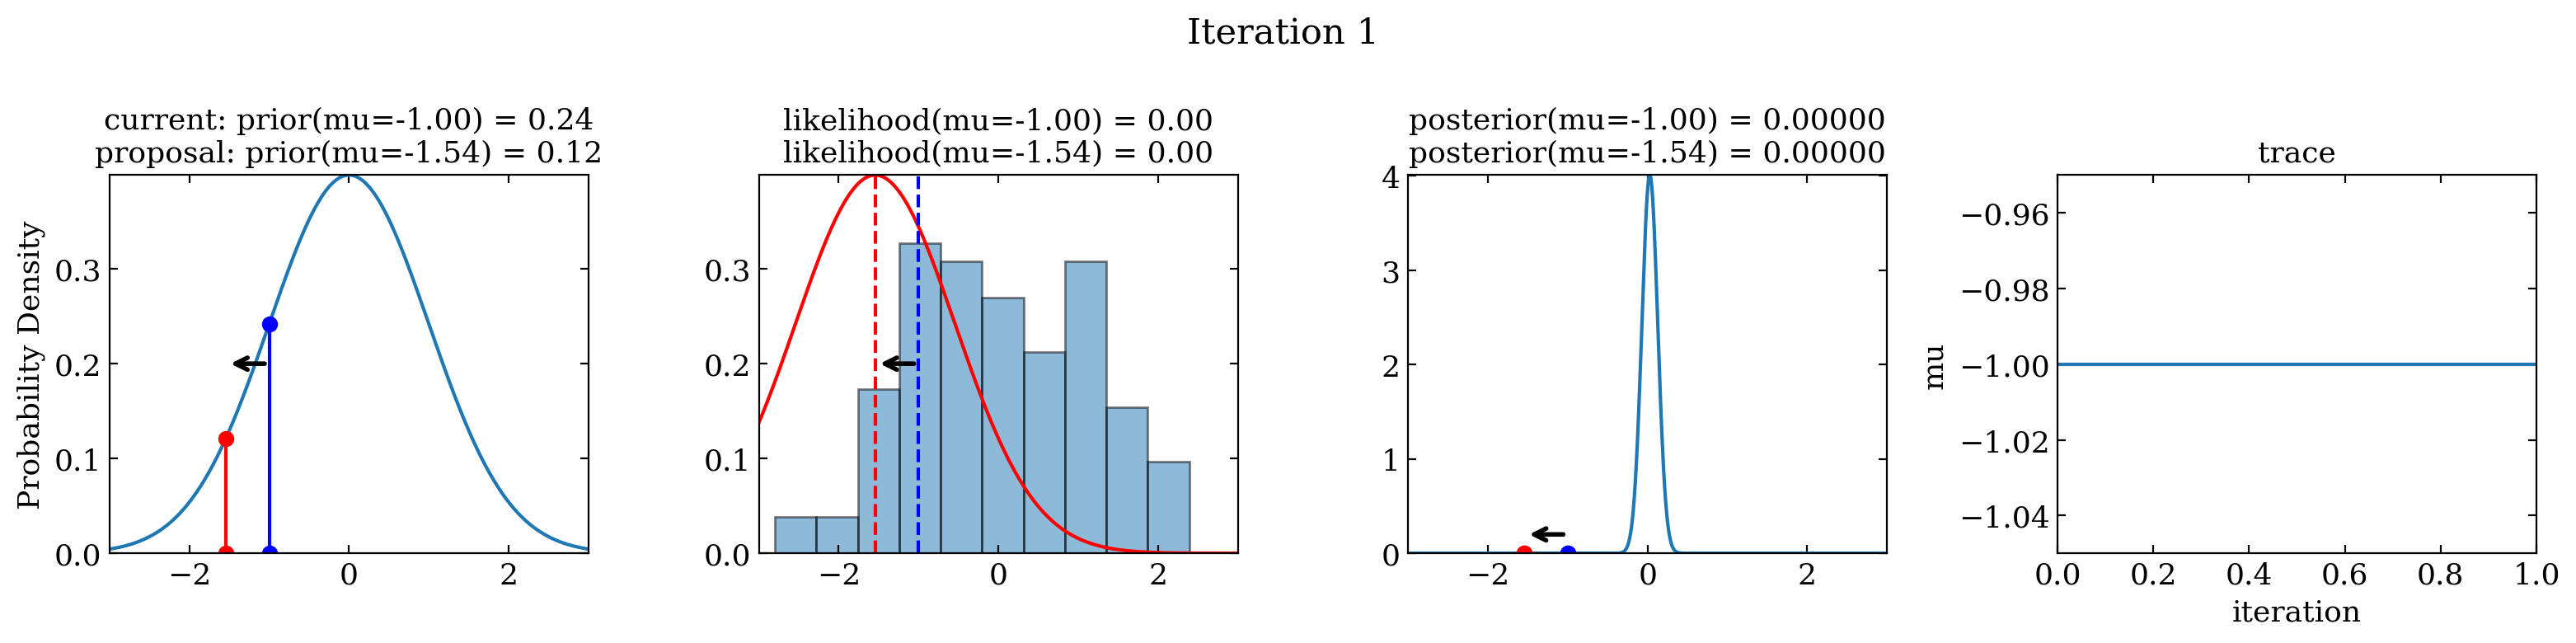

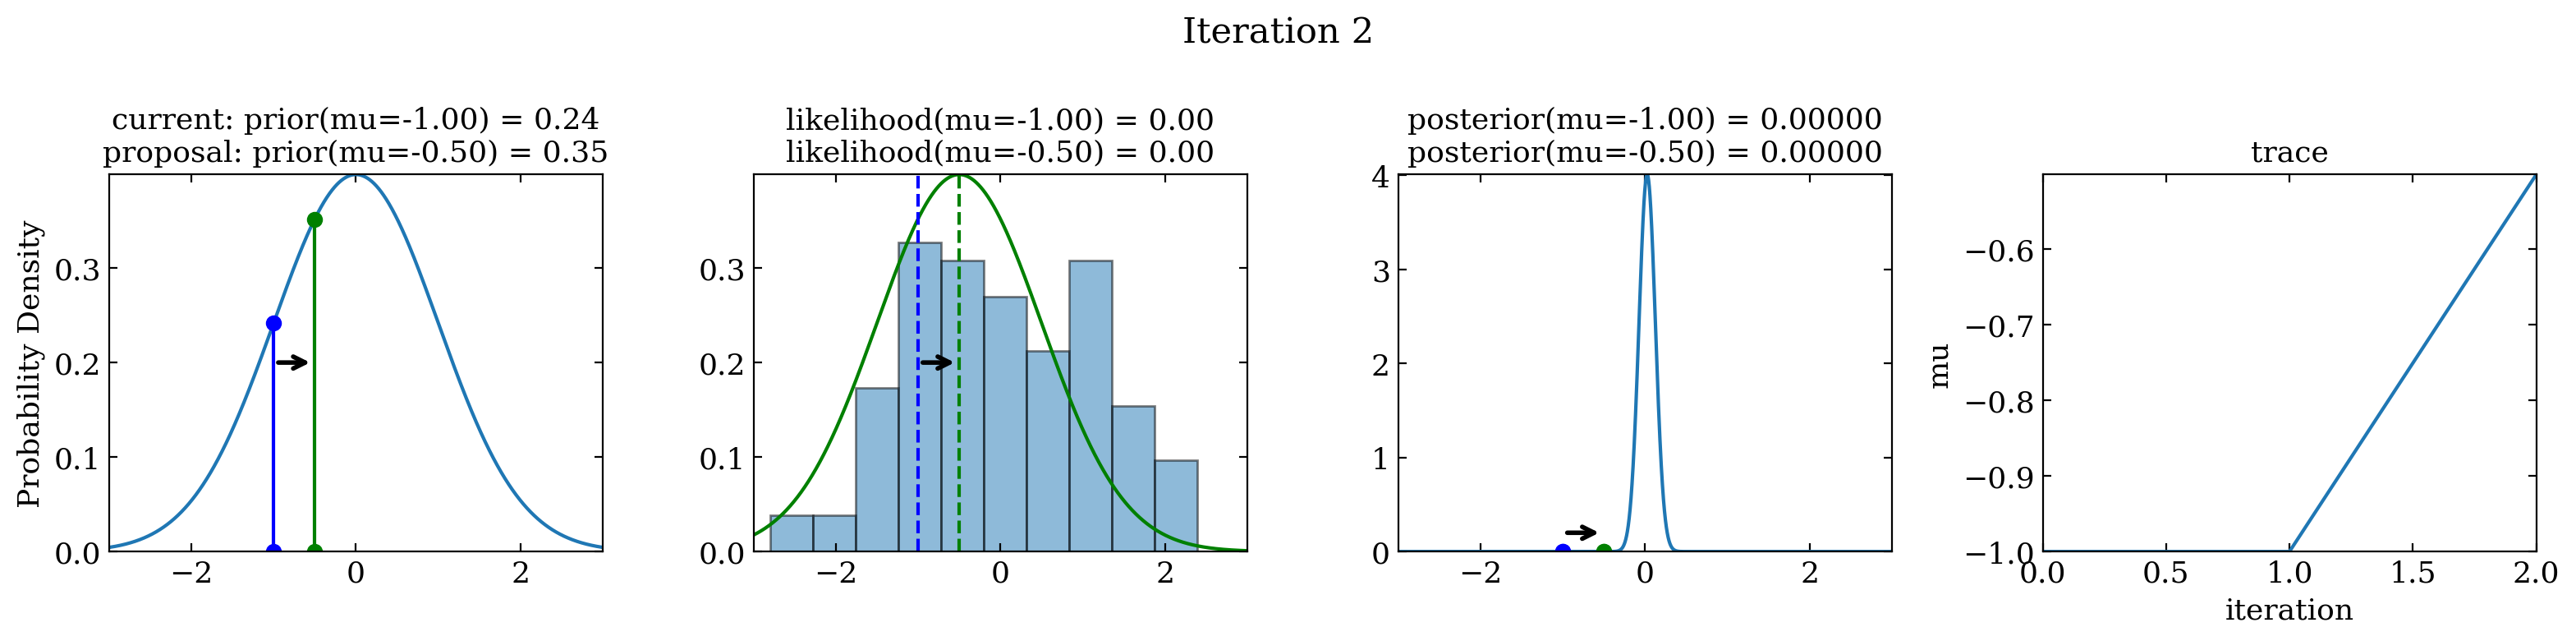

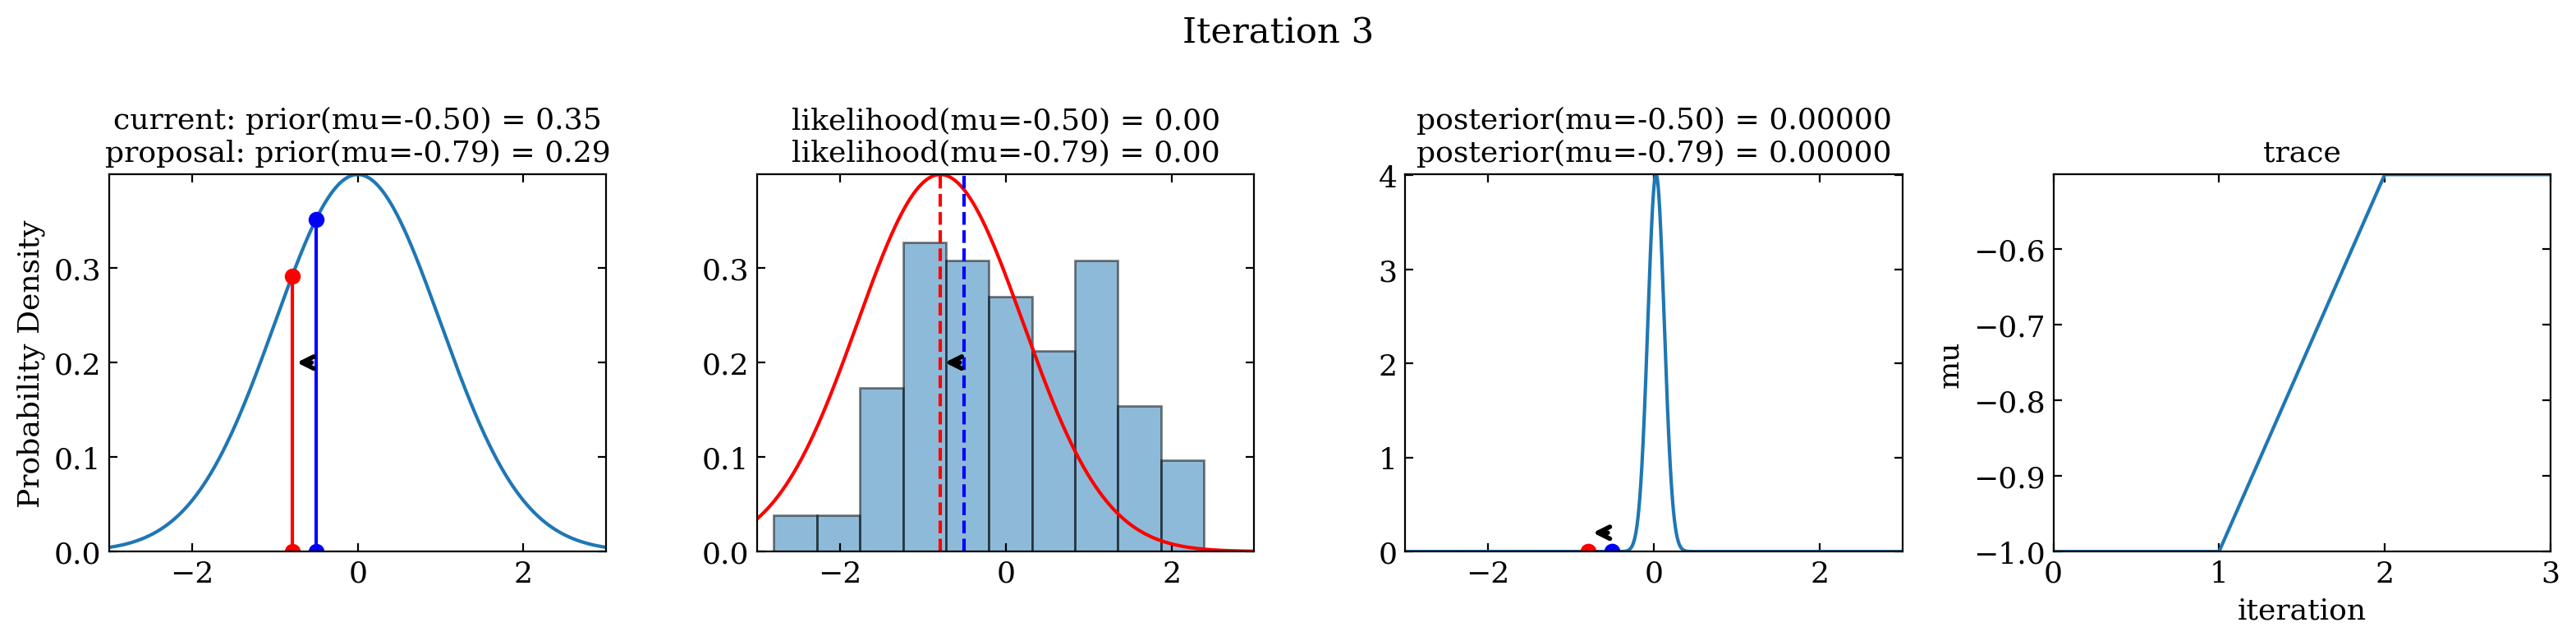

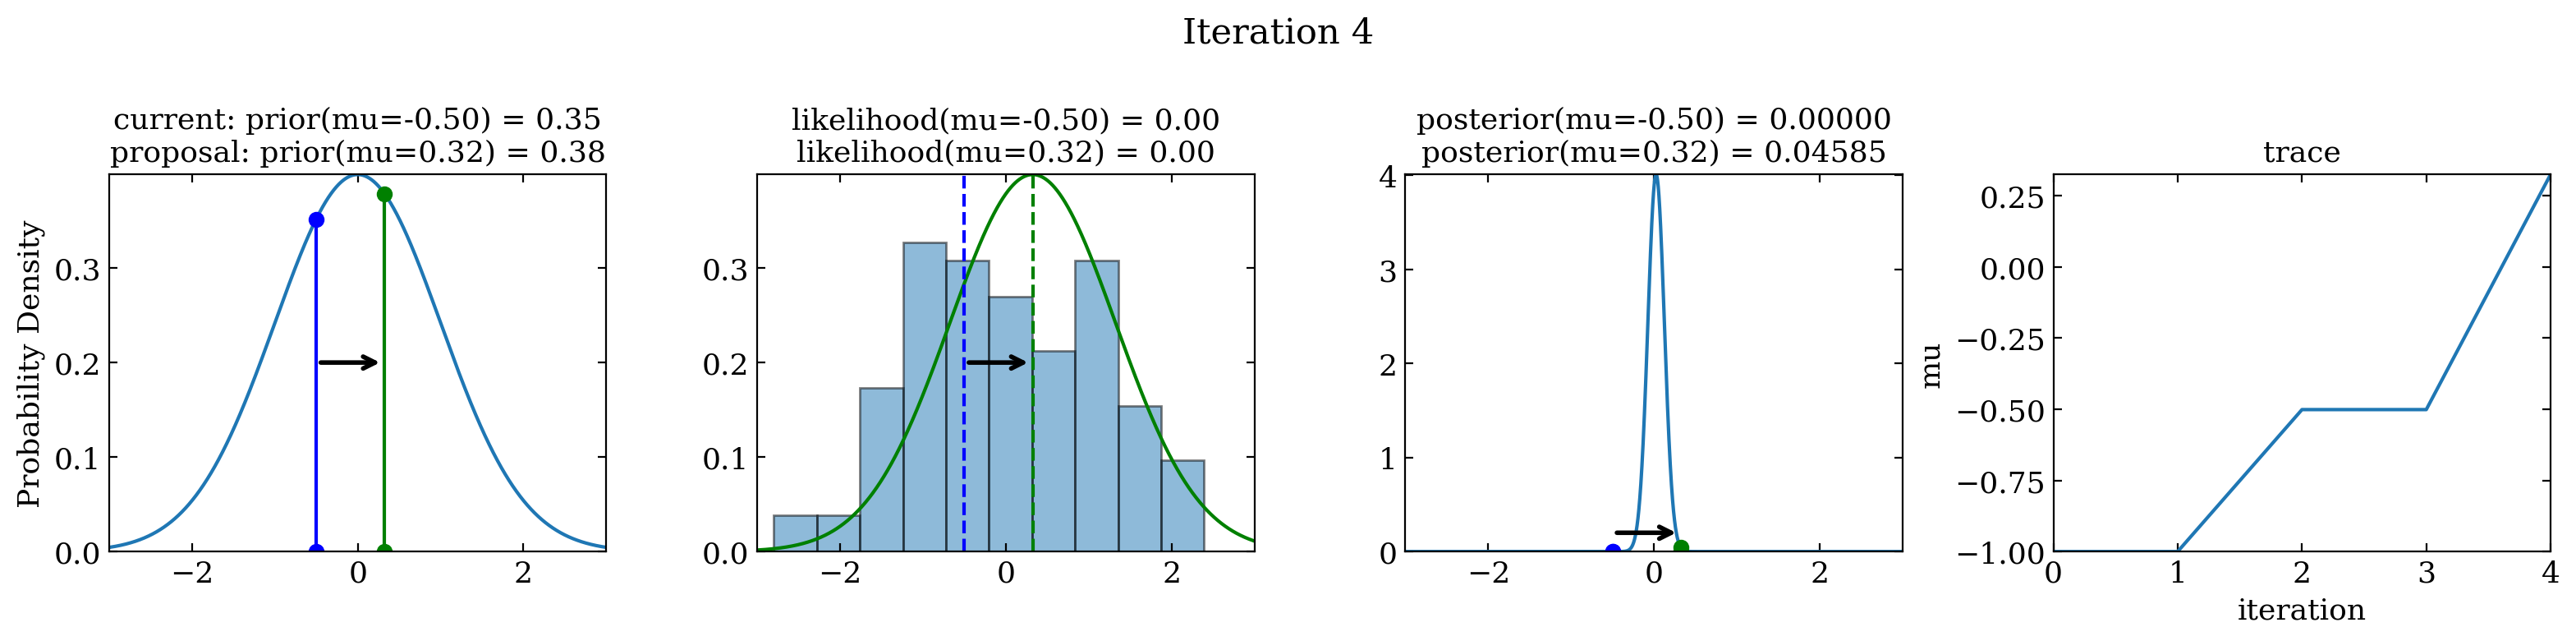

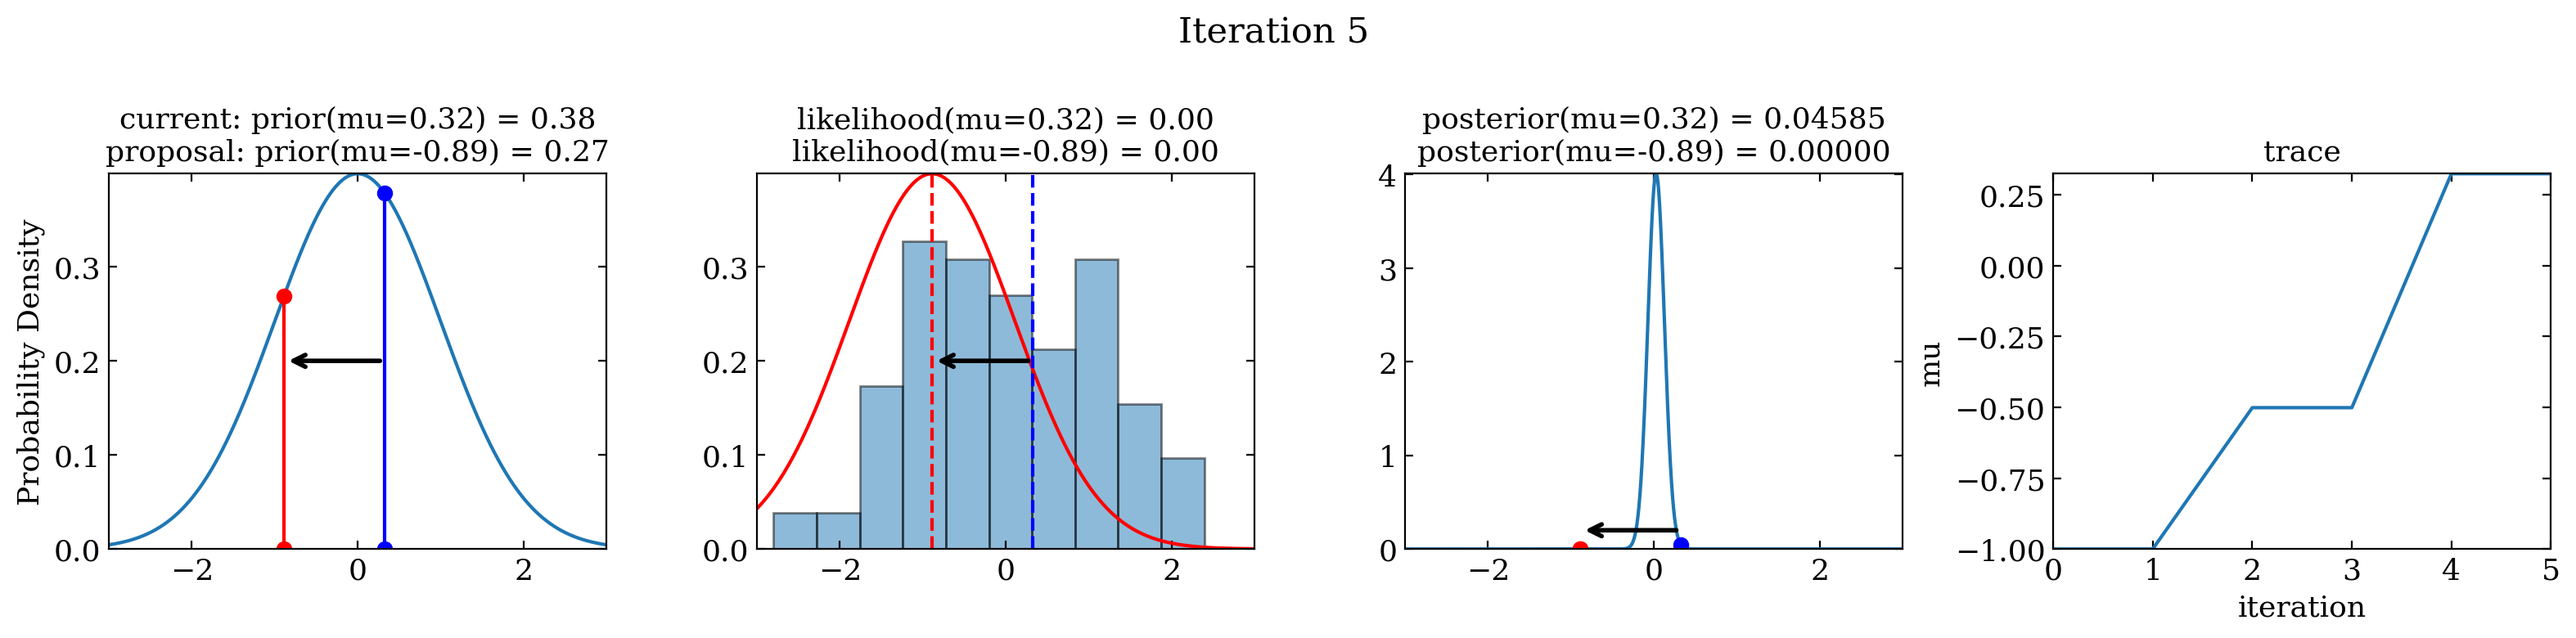

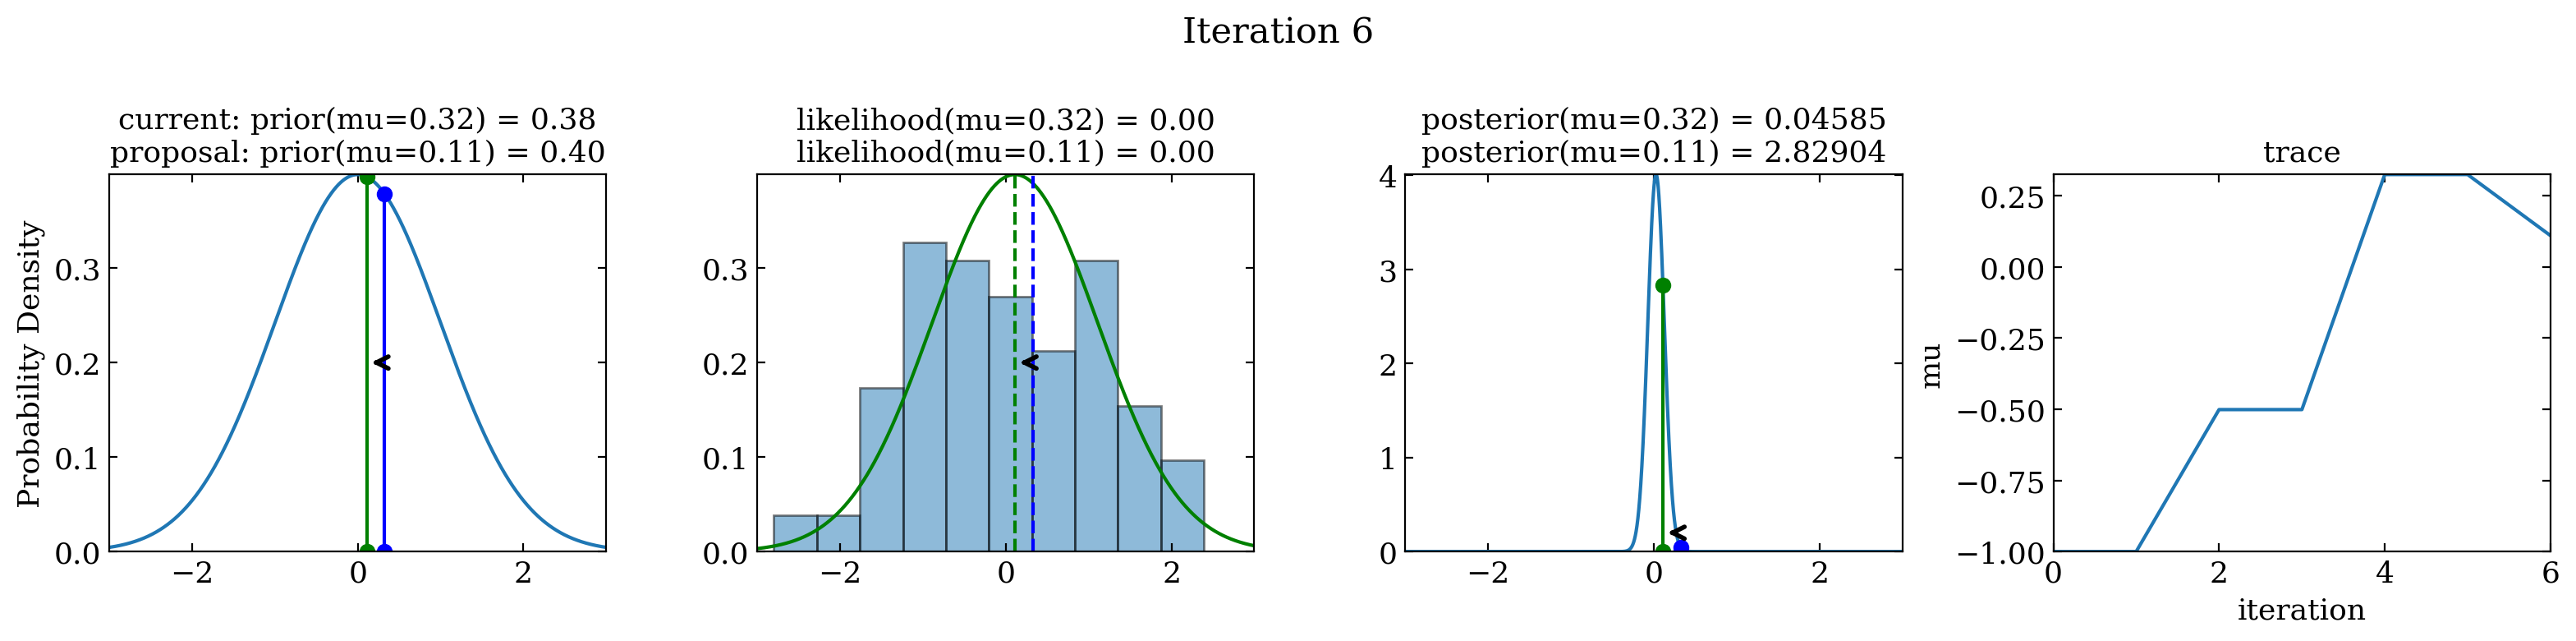

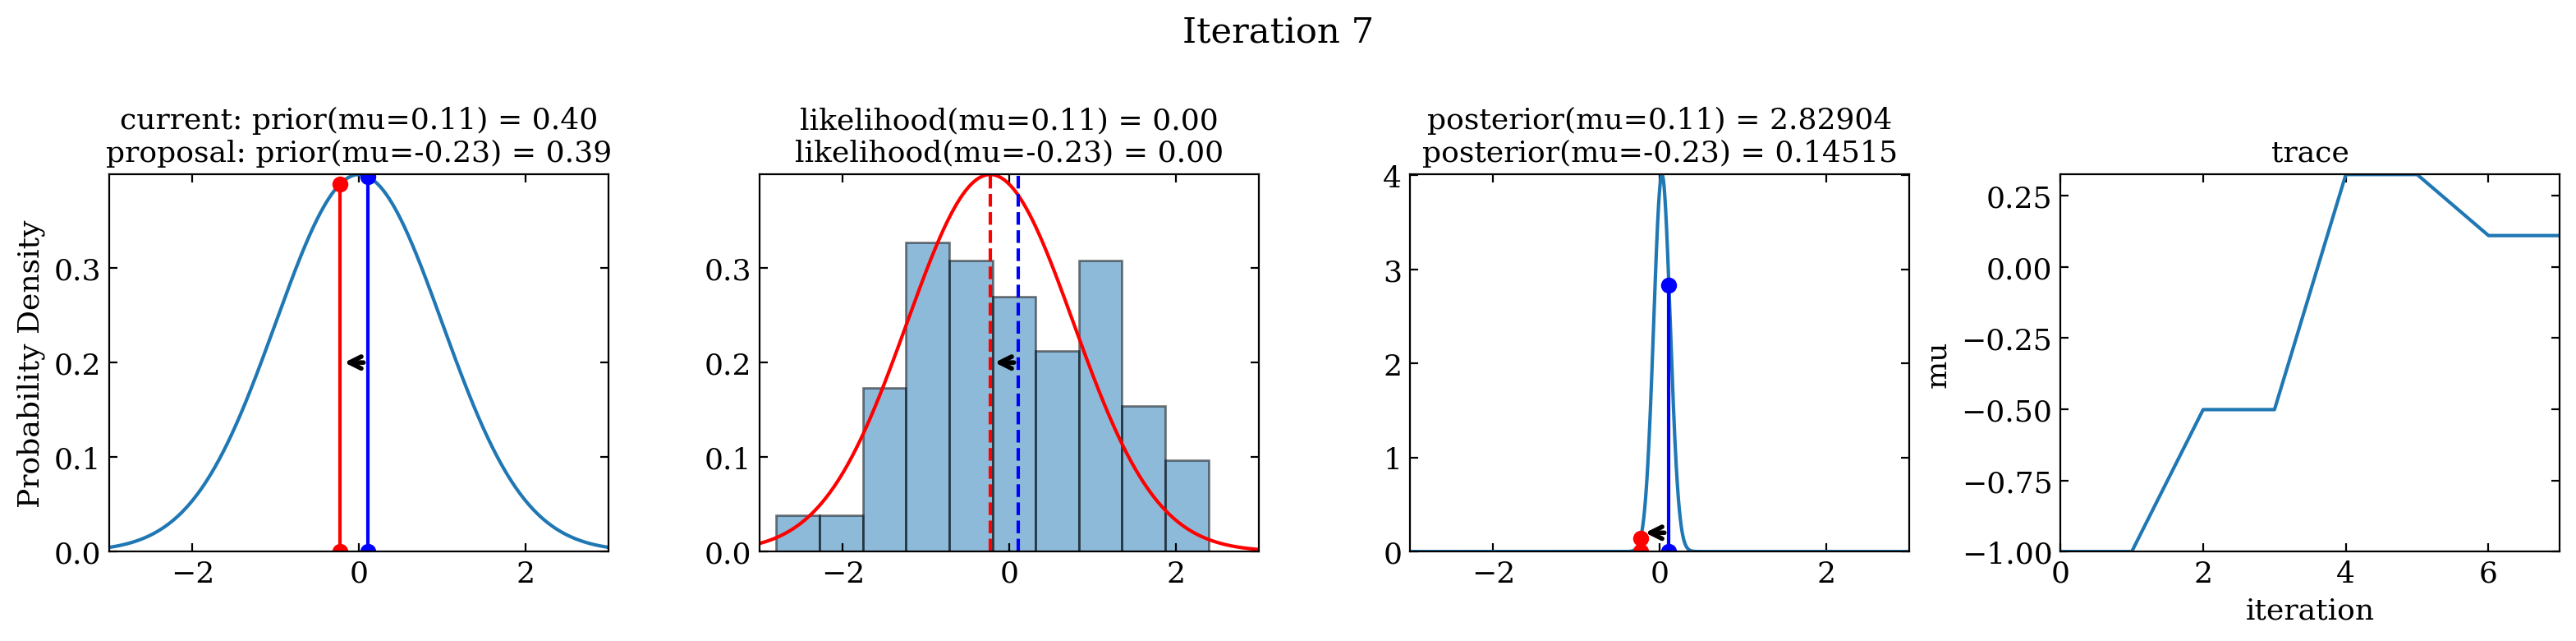

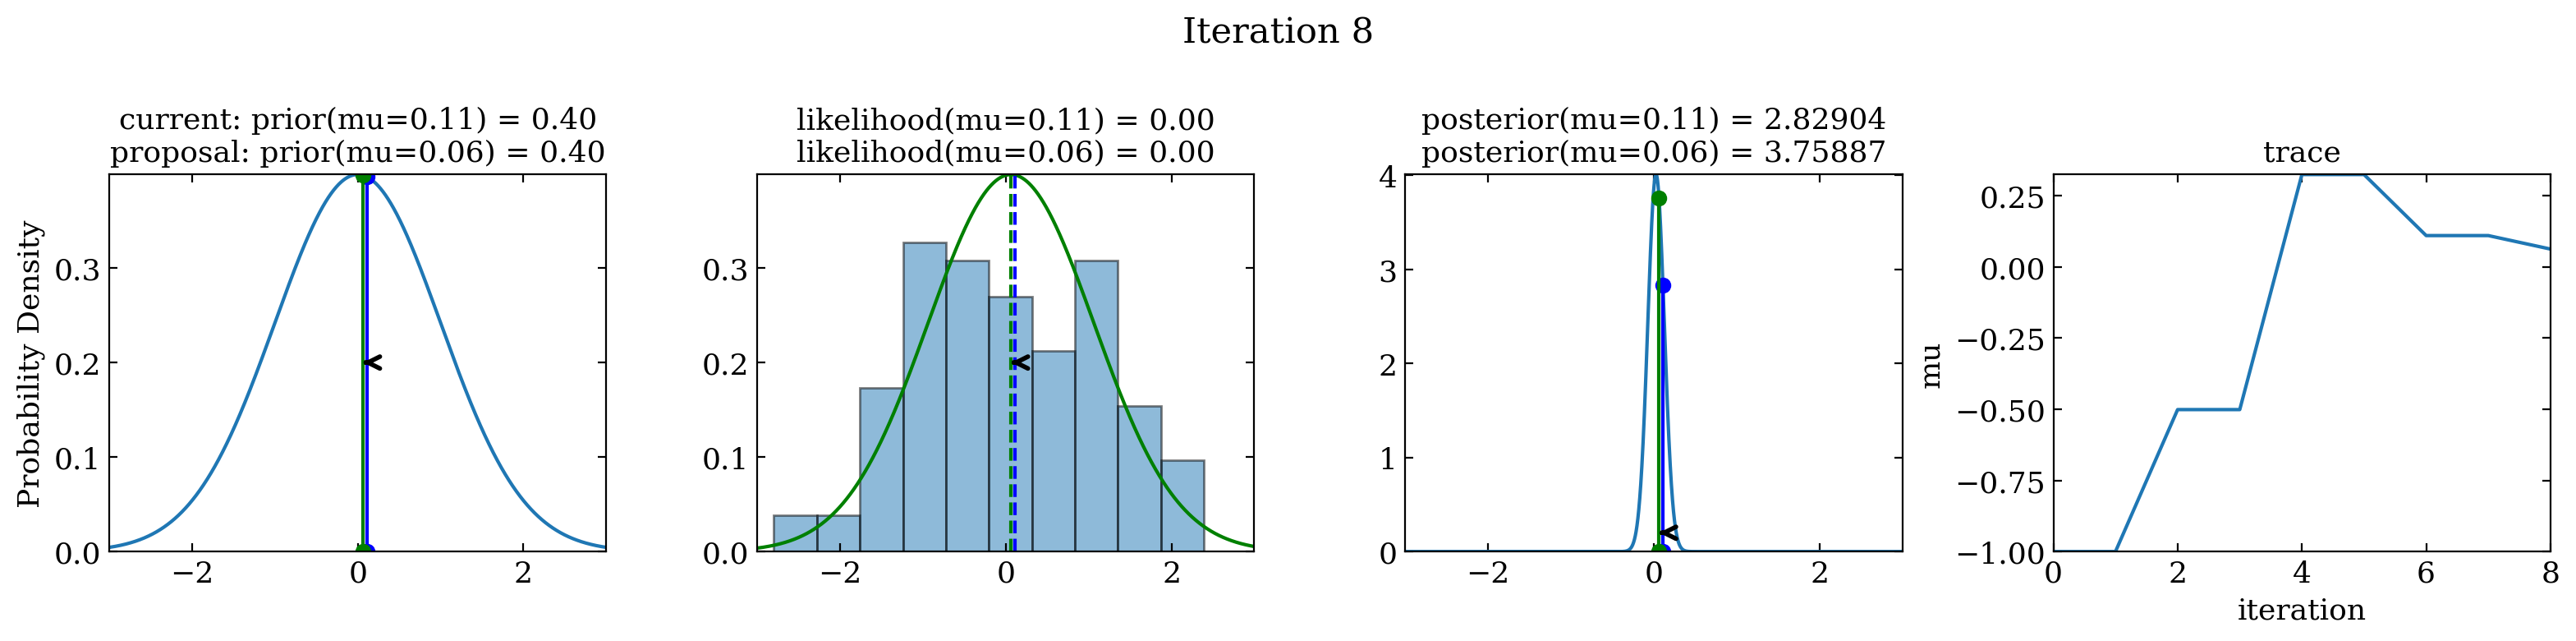

In [36]:
np.random.seed(123)
samples = sampler(data, samples=8, mu_init=-1., plot=True);

What happens when we do this many times? You might need to wait for a minute: running MCMCs can sometimes feel like watching paint dry.

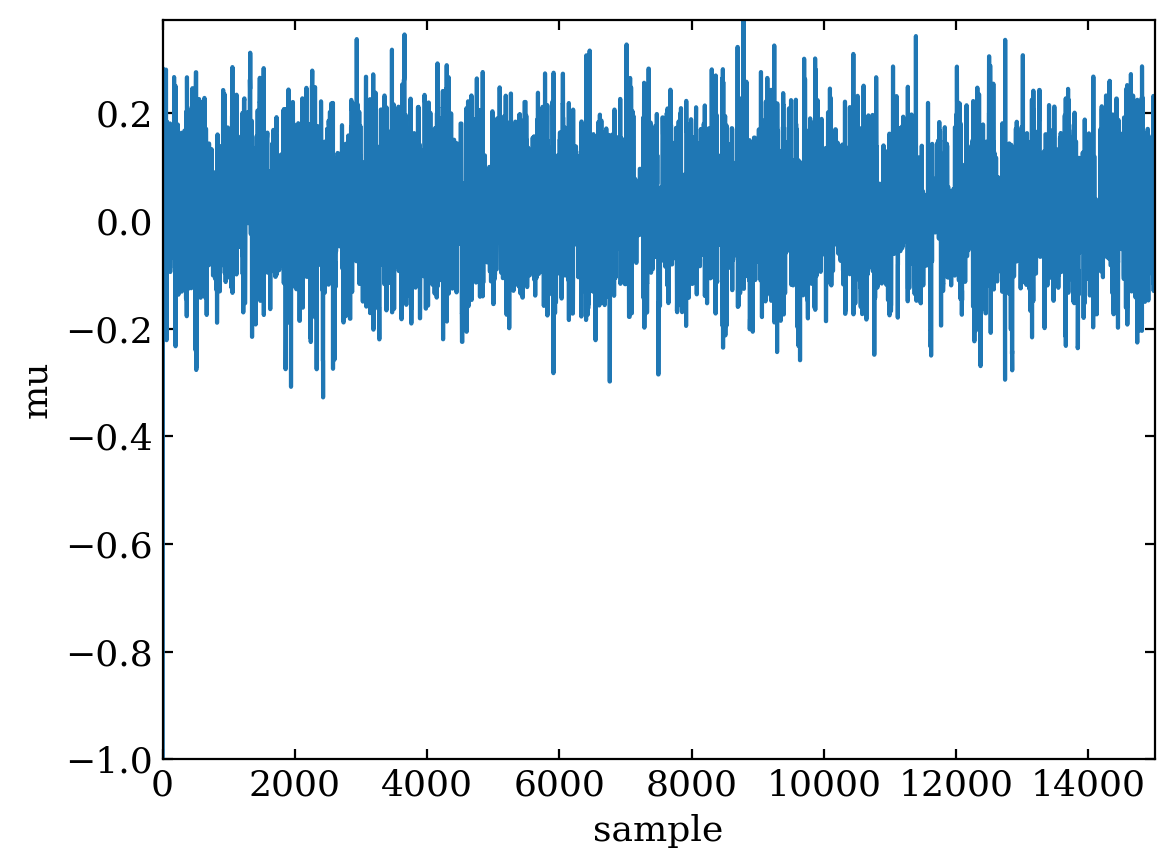

In [37]:
posterior = sampler(data, samples=15000, mu_init=-1.)
fig, ax = plt.subplots()
ax.plot(posterior)
_ = ax.set(xlabel='sample', ylabel='mu');

What's happening at the beginning? That depends on our initial proposal, which is bad. One always needs to remove some samples at the beginning. This is called **"burn in"**.

Making a histogram of these results is our estimated posterior probability distribution. Let's remove the first $500$ points as burn-in.

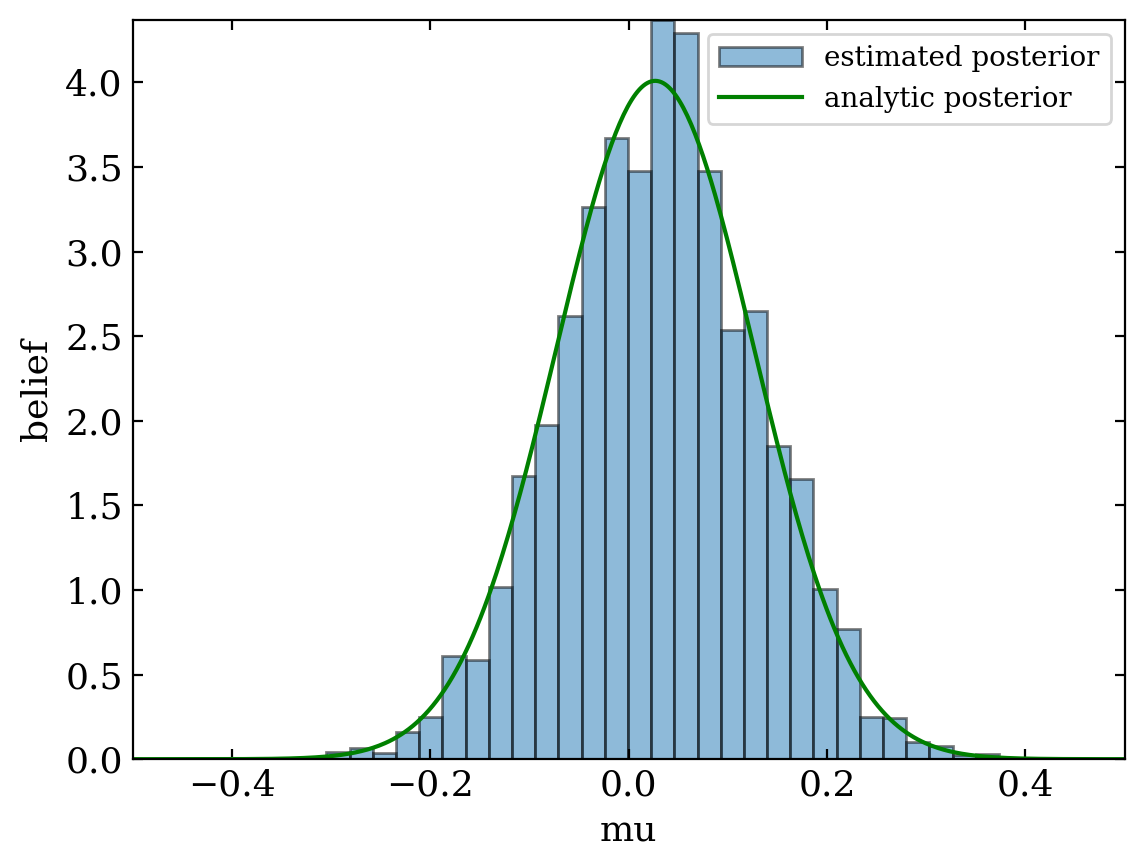

In [38]:
ax = plt.subplot()

burn = 500
ax.hist(posterior[burn:], bins=30, alpha=0.5, 
        density='True', label='estimated posterior')

xplot = np.linspace(-.5, .5, 500)
post = calc_posterior_analytical(data, xplot, 0, 1)
ax.plot(xplot, post, 'g', label='analytic posterior')
_ = ax.set(xlabel='mu', ylabel='belief');

ax.legend(fontsize=10);

We can compute the expected value of $\mu$, credible regions, and the MAP value.

In [39]:
# expected value
ex_mu = np.mean(posterior[burn:])

# 68% equal-tailed credible region
lower, upper = np.percentile(posterior[burn:],q=16), np.percentile(posterior[burn:],q=84)   

# MAP value
# many samplers output the likelihood x prior, 
# so it's usually than this
hist, bins = np.histogram(posterior[burn:], bins=30)
bin_mid = 0.5 * (bins[1:] + bins[:-1])
idx = np.argsort(hist)[-1]
map_theta = bin_mid[idx]

print('Expected value of mu = ' + str(ex_mu))
print('68% credible region = ' + str(lower) + ' to ' + str(upper))
print('MAP value = ' + str(map_theta))

Expected value of mu = 0.0316540961254028
68% credible region = -0.06622887192725731 to 0.1320541668184732
MAP value = 0.03442424988343204


Our algorithm for deciding where to move next used a normal proposal distribution centered at the current value with width 0.5. Let’s make this much smaller and much larger and see what it does to sampling efficiency in the traceplot.

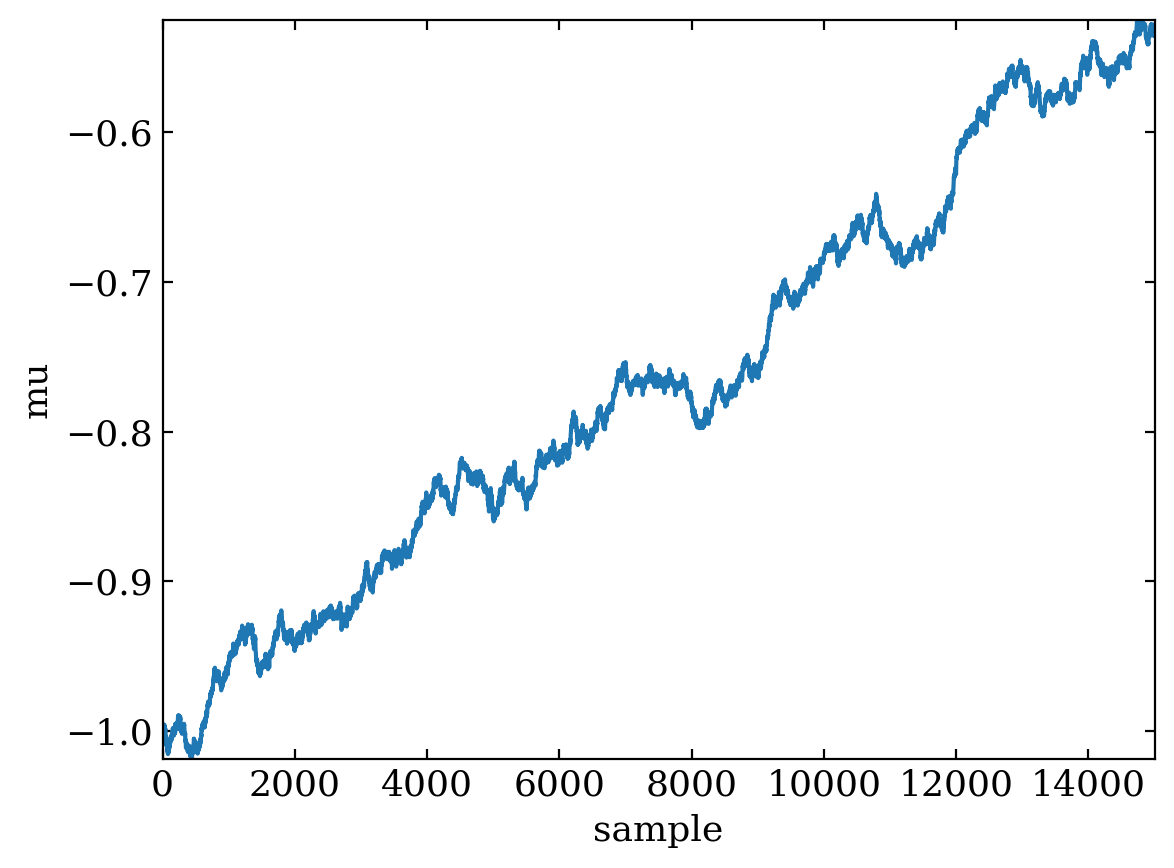

In [40]:
posterior = sampler(data, samples=15000, mu_init=-1., proposal_width=0.001)
fig, ax = plt.subplots()
ax.plot(posterior)
_ = ax.set(xlabel='sample', ylabel='mu');

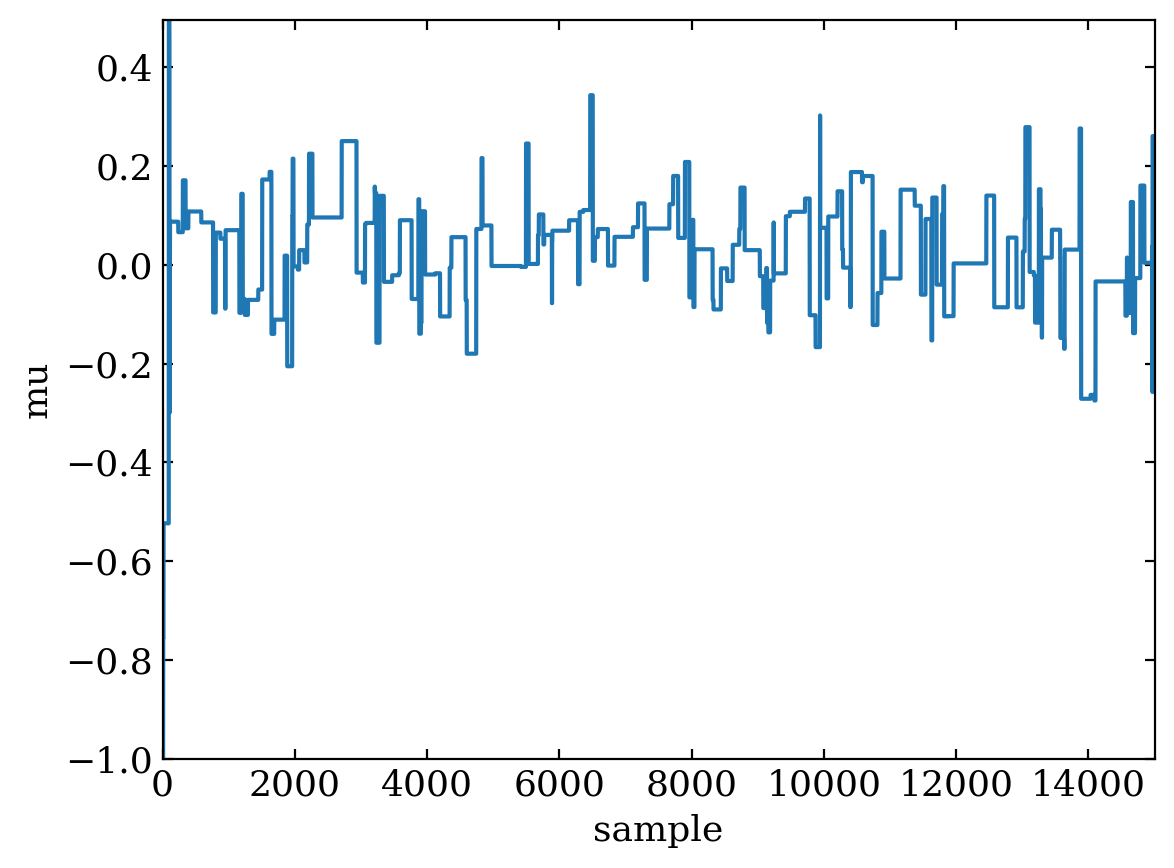

In [41]:
posterior = sampler(data, samples=15000, mu_init=-1., proposal_width=10)
fig, ax = plt.subplots()
ax.plot(posterior)
_ = ax.set(xlabel='sample', ylabel='mu');

Ideally, our traceplot in each parameter would be **mixing well** (moving across parameter space without getting stuck), and carving out the same patch of parameter space on average. **The acceptance rate of new samples should be somewhere between $\sim20-50\%$ depending on the type of problem you're trying to solve**.

Take a look at these plots below for an arbitrary problem. The 1st column is the trace, the 2nd is the histogram of the chain, and the 3rd column is the acceptance rate of newly proposed samples. 

- **In the top row, the proposal width was too small**. The chain hardly moves, giving it a high acceptance rate but poor global exploration of the posterior surface.
- **In the middle row, the proposal width was too big**. The chain proposes new points that are far away from regions of high probability density, meaning that they're hardly ever accepted. The chain gets stuck.
- **Only the bottom row shows reasonable sampling. This is the Goldilocks scenario.**

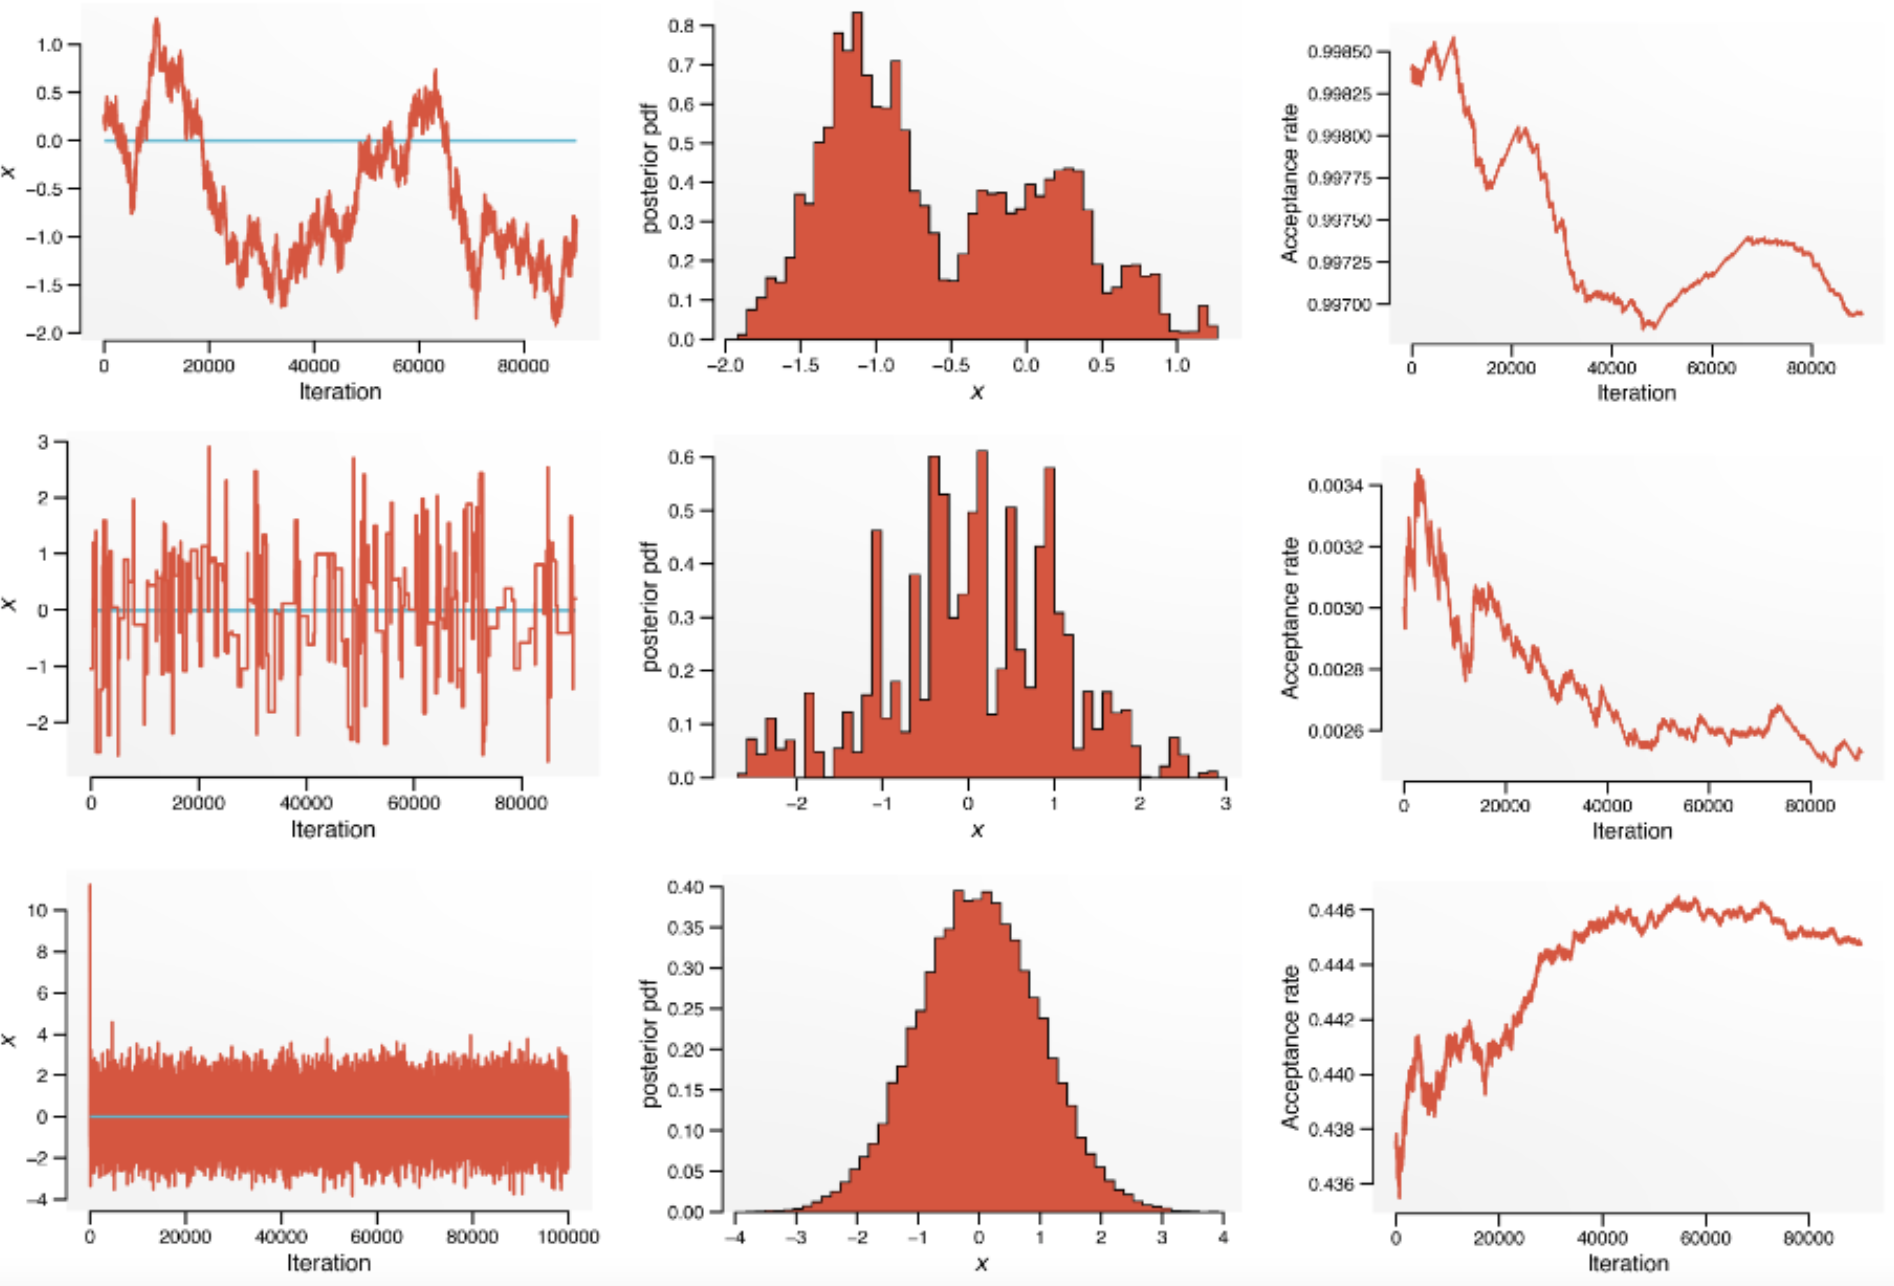

---

## Very important

Note that MCMC does not give you the value of the pdf on a grid: **all you have are the samples!**

Crucially, the **density** of samples is proportional to the posterior. So running a density estimation tool (histogram, KDE, etc) on those returns the  pdf you're looking for.

---

### See it live

- The example you worked through above was overkill in that we were only trying to estmate $\mu$. Note also that we can do this in fewer than 10 lines using something like ${\tt emcee}$ or ${\tt pymc3}$ (next time!).

- The process is essentially the same when you add more parameters. Check out this [animation of a 2-D process](http://twiecki.github.io/blog/2014/01/02/visualizing-mcmc/) by the same author whose example we just followed.

- Also, check out [this](https://chi-feng.github.io/mcmc-demo/app.html?algorithm=AdaptiveMH&target=multimodal) amazing visualization tool, and have some fun exploring the many different types of sampling algorithms. Metropolis-Hastings is only the start!

- In fact, the most basic type of MH algorithm I would ever personally use is **Adaptive Metropolis-Hastings**, where the proposal width updates itself in response to the currently-estimate covariance matrix of the MCMC chain (i.e. the chain learns how to optimize itself).

- In practice, MH is too simple for current problems. There are plenty of tools that a professional astrophysicist can have in their toolbox to tackle research problems.

# Practical MCMC <a class="anchor" id="one"></a>

In [3]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

from scipy import integrate
from scipy.stats import norm
from scipy.stats import cauchy
from astroML.plotting import hist
from astroML.plotting.mcmc import convert_to_stdev
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)
from astroML.plotting.mcmc import convert_to_stdev
import warnings; warnings.simplefilter('ignore')

/Users/dgerosa/box/lib/python3.11/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


### Practical MCMC chain checks

1. **CHECK ACCEPTANCE:** some MCMC samplers give an updating estimate of the current acceptance rate of new samples. Ideally for a sampler using some form of Metropolis-Hastings, this should be somewhere between $\sim20-50\%$ depending on the type of problem you're trying to solve.

    - If the acceptance rate is high, the chain is moving but might not be exploring well. This gives high acceptance rate but poor global exploration of the posterior surface.
    
    - If the acceptance rate is low, the chain is hardly moving meaning that it's stuck in a rut or trying to jump to new points that are too far away.
    

2. **CHECK TRACEPLOTS:** After getting an idea of the acceptance rate, make traceplots of your chain. Ideally, our traceplot in each parameter would be mixing well (moving across parameter space without getting stuck), and carving out the same patch of parameter space on average. This will tell you whether your chain is getting stuck or encountering inefficiencies.


3. **CHECK AUTOCORRELATION LENGTH:** The MCMC chain with Metropolis-Hastings will not give fully-independent random samples. The next point is influenced by where the previous point was. We need to check how much to down-sample the chain so that the points lack memory and influence from others. This is given by the ***autocorrelation length***. The operation of selecting samples every other autocorrleation lenght is called ***thinning***. For a discussion on the mathematical definition of the autocorrelation, I find the [emcee documentation](https://emcee.readthedocs.io/en/stable/tutorials/autocorr/) particularly clear. It is a concise version of [this paper](https://www.semanticscholar.org/paper/Monte-Carlo-Methods-in-Statistical-Mechanics%3A-and-Sokal/0bfe9e3db30605fe2d4d26e1a288a5e2997e7225?p2df).

Check this out: [Roy (2019)](https://arxiv.org/abs/1909.11827)

##  MCMC with emcee <a class="anchor" id="three"></a>

This a popular MCMC package... Import `emcee` and generate some homoscedastic Gaussian data. We'll assume the standard deviation is know, so we're only estimating $\mu$.

In [5]:
import emcee
import scipy.stats as stats

np.random.seed(21)
Ndata = 100
mu = 1.0
sigma = 0.5 # assumed known 
data = stats.norm(mu, sigma).rvs(Ndata)

data

array([ 0.97401788,  0.94440197,  1.5208984 ,  0.37163035,  1.37269384,
        0.14447312,  0.89706781,  0.88271435,  1.56407202,  0.99368702,
        0.69339986,  1.68684425,  1.80549599,  0.65538586,  1.34596186,
        0.7759422 ,  1.08117123,  1.12861457,  0.36227207,  1.03200222,
        0.46907169,  0.5053158 ,  0.77113839,  0.00790919,  0.26177894,
        1.11590148,  1.32207964,  1.42606135,  0.76799064,  1.3485883 ,
        1.78394109,  1.5892781 ,  0.30802157,  0.1263331 ,  1.2013619 ,
        1.6222414 ,  0.98808182,  1.47628385,  1.12248197,  1.11204857,
        1.1483406 ,  1.11037669,  0.78834958,  1.92280756,  1.46005728,
        0.72104189,  0.85738748,  0.47936668,  1.24018471,  0.2863112 ,
        0.83336679,  1.37365425,  1.28011481,  1.28685447,  0.40955974,
        1.38232504,  0.93280751,  1.66231884,  0.86178618,  1.83977549,
        1.20758094,  1.3738408 ,  0.8037348 ,  0.79683796,  0.80707701,
        1.50045109,  0.77615878,  0.94195799,  1.58450731,  1.25

In [6]:
def Likelihood(x, sigma, data):
    # Gaussian likelihood 
    return np.prod(np.exp(-(data-x)**2 /2 /sigma**2))

def Prior(x):
    return 1.0 / 10   # flat: it cancels out and has no effect 

def myPosterior(x, sigma, data):
    return Likelihood(x, sigma, data) * Prior(x)

# emcee wants ln of posterior pdf
def myLogPosterior(x, sigma, data):
    return np.log(myPosterior(x, sigma, data))

`emcee` combines multiple "walkers", each of which is its own MCMC chain. The number of trace results will be nwalkers $\times$ nsteps.

In [7]:
ndim = 1  # number of parameters in the model
nwalkers = 6  # number of MCMC walkers
burn = 10000  # "burn-in" period to let chains stabilize
nsteps = 100000  # number of MCMC steps to take **for each walker**

# initialize theta 
np.random.seed(0)
starting_guesses = np.random.random((nwalkers, ndim))

# the function call where all the work happens: 
sampler = emcee.EnsembleSampler(nwalkers, ndim, myLogPosterior, args=[sigma, data])
sampler.run_mcmc(starting_guesses, nsteps)
 
# sampler.chain is of shape (nwalkers, nsteps, ndim)
# throw-out the burn-in points and reshape:
emcee_trace  = sampler.chain[:, burn:, :].reshape(-1, ndim)

print("done")

done


In [ ]:
print(sampler.chain.shape) #original chain structure
print(emcee_trace.shape) #burned and flattened chain

In [ ]:
emcee_trace.flatten()

In [ ]:
# Now take one point every autocorrelation lenght
tau = sampler.get_autocorr_time()
print(tau)
thin = int(tau+1)

In [ ]:
emcee_trace = sampler.get_chain(discard=burn, thin=thin, flat=True).flatten()

Text(0.5, 1.0, 'Chain from emcee')

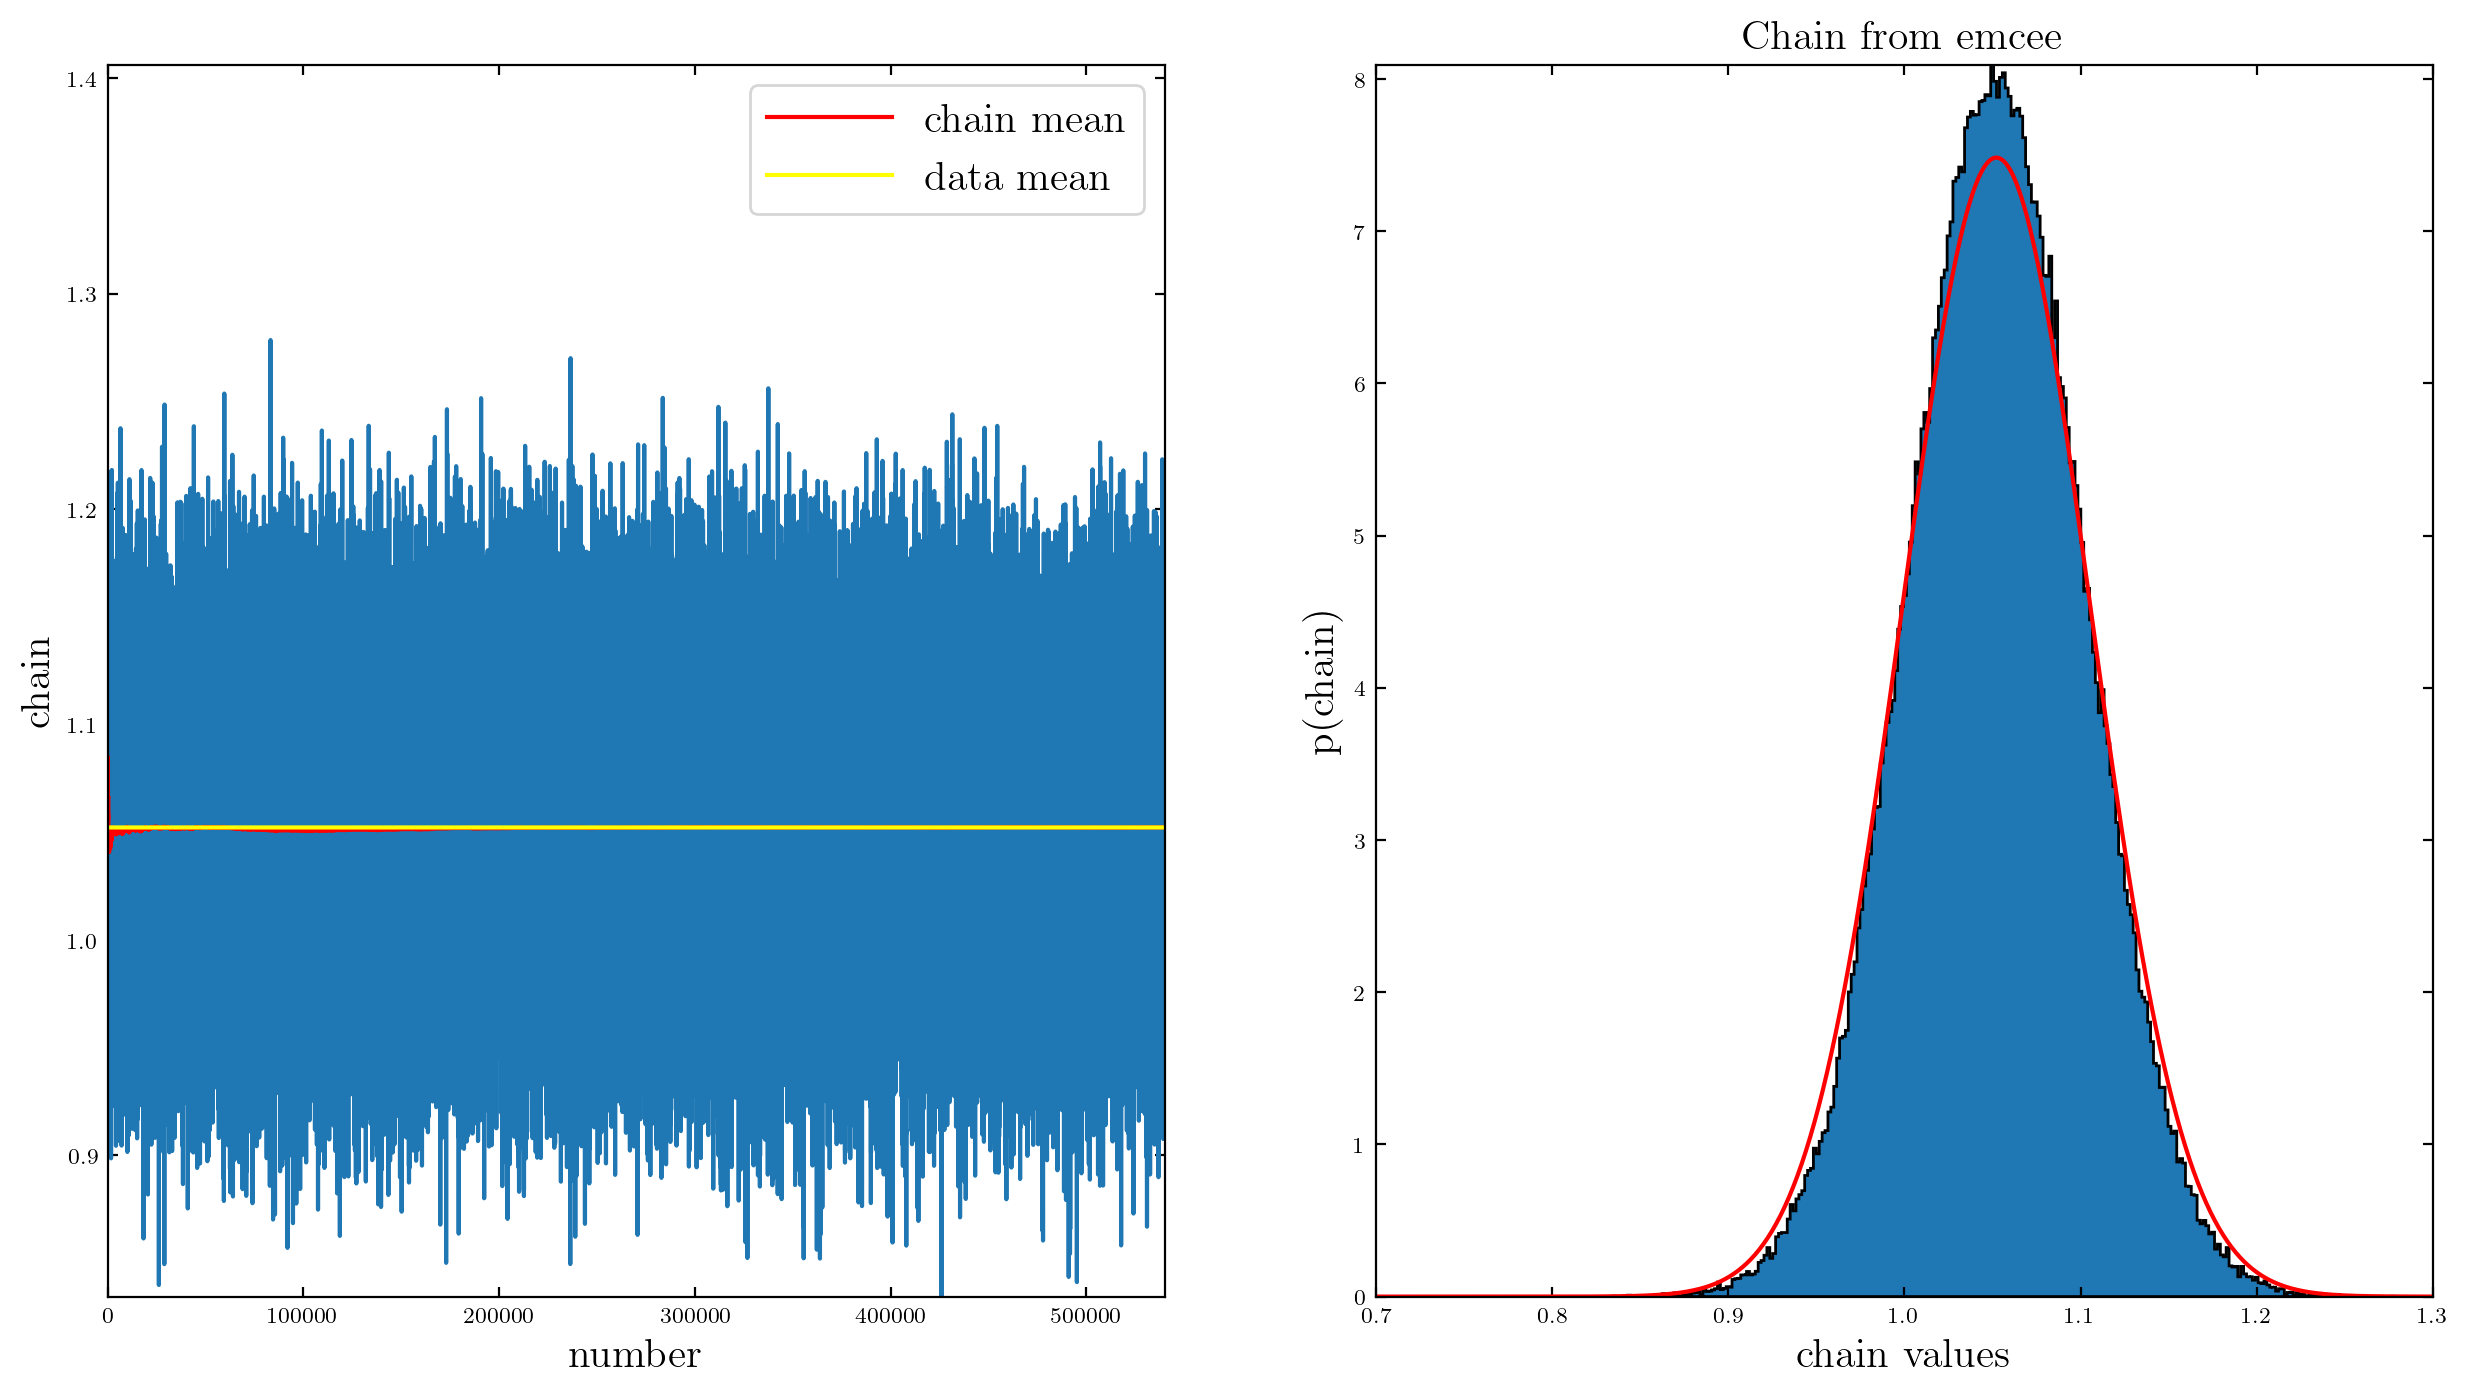

In [8]:
# plot 
plt.rcParams.update({'font.size': 22})

fig = plt.figure(figsize=(15, 8))
#fig.subplots_adjust(left=0.11, right=0.95, 
                   # wspace=0.35, bottom=0.18)

chainE = emcee_trace #[0]
M = np.size(chainE)

ax1 = fig.add_subplot(121)
xgrid = np.linspace(1, M, M)
plt.plot(xgrid, chainE)
ax1.axis([0, M, np.min(chainE), 1.1*np.max(chainE)])
plt.xlabel('number',fontsize=15)
plt.ylabel('chain',fontsize=15)

# plot running mean: 
meanC = [np.mean(chainE[:int(N)]) for N in xgrid]
ax1.plot(xgrid, meanC, c='red', label='chain mean') 
ax1.plot(xgrid, 0*xgrid + np.mean(data),
         c='yellow',label='data mean')
ax1.legend(fontsize=15)

ax2 = fig.add_subplot(122)
# skip first burn samples
Nburn = 1000
#Nchain = np.size(chainE[xgrid>burn])
Nhist, bins, patches = plt.hist(chainE, 
                                bins='auto', histtype='stepfilled',density=True)

# plot expectations based on central limit theorem
binwidth = bins[1] - bins[0]
muCLT = np.mean(data)
sigCLT = np.std(data)/np.sqrt(Ndata)
muGrid = np.linspace(0.7, 1.3, 500)
gauss = stats.norm(muCLT, sigCLT).pdf(muGrid) 
ax2.plot(muGrid, gauss, c='red') 

ax2.set_ylabel('p(chain)',fontsize=15)
ax2.set_xlabel('chain values',fontsize=15)
#ax2.set_xlim(0.7, 1.3)
#ax2.set_ylim(0, 1.2*np.max(gauss))
ax2.set_title(r'Chain from emcee',fontsize=15)

# In-class exercise

## Time transients

Time transients appear in many physical applications: electromagnetic signals, electronics readouts, exploding stars, gravitational waves, and more.

An instrument (say a microphone) is taking data and there is some background noise. Then at some point a signal appears. The signal features contain precious information (which rock band is playing, or details of an exploding star).

This is based on a real research-style problem, so you are encouraged to use references and resources while solving it.

### Tasks

1) Read in `transient.npy`. This is a (100 x 3) numpy array, containing some time-series measurements from a transient phenomenon. The first column is time (arbitrary units), the second column is the intensity of the signal (arbitrary units), and the third column are measurement uncertainties on the latter. Plot this data with the uncertainties.

2) One possible model for this data is a sharp burst with an exponential tail rising above a nominal background level. This model can be described as:

$y = b$, for $t<t_0$

$y = b + A\exp[-\alpha(t-t_0)]$, for $t\geq t_0$

where $b$ is the background amplitude, $A$ is the burst amplitude, $t_0$ is the burst epoch, and $\alpha$ encodes how rapidly the burst dies off.

Code up this burst model, and code a likelihood function for this data with the burst model.

3) Using one of the MCMC samplers introduced in this notebook, perform a Bayesian analysis that recovers an MCMC chain of posterior probability samples for the joint parameter space of $\{b,A,t_0,\alpha\}$. You must decide on how many samples are appropriate for running your MCMC. For your priors, make them $b\in \mathrm{Uniform}[0,50]$, $A\in \mathrm{Uniform}[0,50]$, $t_0\in \mathrm{Uniform}[0,100]$, and $\ln\alpha\in \mathrm{Uniform}[-5,5]$.

4) Perform an appropriate check to burn-in your chain, and thin the chain by selecting only points every auto-correlation length. If you are left with a small number of samples after thinning then you may need to run your MCMC for longer in (3).

5) Make a corner plot of the $4$-D parameter space, with labels, $[68,95]\%$ credible levels and quantiles, and titles.

6) Now choose $100$ samples randomly from your burned, thinned chain and plot the $100$ corresponding burst time-series on a figure along with the original data. You may want to choose a transparency for these $100$ burst curves that allows you to see everything nicely. These are showing the posterior spread of model solutions that are consistent with the data.

7) For each parameter, find the median and 90% credible region of the marginalized distribution and quote results as, for instance, $t_0=X^{+Y}_{-Z}$ 

8) Another possible model that may explain the data is a Gaussian profile.

$y = b + A\exp[-(t-t_0)^2 / 2\sigma_W^2]$

 Fit this model usign an MCMC and reasonable priors (this time is up to you to decide...)

9) Now.. is that transient an exponential pulse or a gaussian? What do you think? We need to quantify it... and briefly justify your choice using the diagnostics and posterior results.